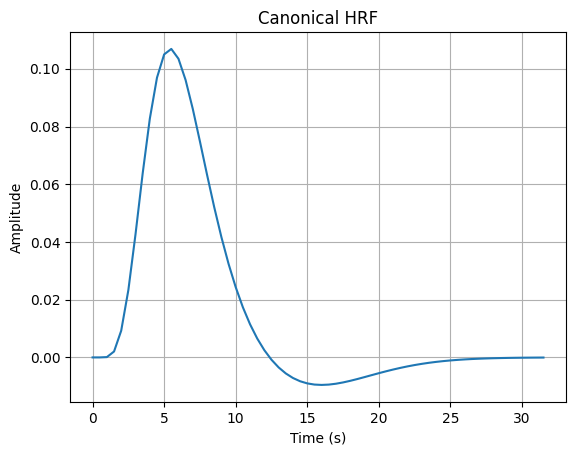

In [1]:
from nilearn.glm.first_level import spm_hrf
import numpy as np
import matplotlib.pyplot as plt

TR = 0.5

# TR: repetition time (e.g., 0.5s)
frame_times = np.arange(0, 32, TR)  # oversampling

# Get the canonical SPM HRF
hrf = spm_hrf(TR, oversampling=1, time_length=32.0, onset=0.0)

# Plot it (optional)
plt.plot(frame_times, hrf)
plt.title("Canonical HRF")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

2025-05-15 19:46:49.746 | INFO     | multimodal_causal_adversarial_network.config:<module>:11 - PROJ_ROOT path is: /Users/pcoffey/Dev/school/Capstone/multimodal-causal-adversarial-network


2025-05-15 19:46:55.286 | INFO     | multimodal_causal_adversarial_network.dataset.simulation_dataset:__init__:382 - Generating neural trials...
2025-05-15 19:46:56.949 | INFO     | multimodal_causal_adversarial_network.dataset.simulation_dataset:__init__:403 - Generating fmri trials...
2025-05-15 19:46:56.972 | INFO     | multimodal_causal_adversarial_network.dataset.simulation_dataset:__init__:410 - Generating eeg trials...
(200, 25, 3)


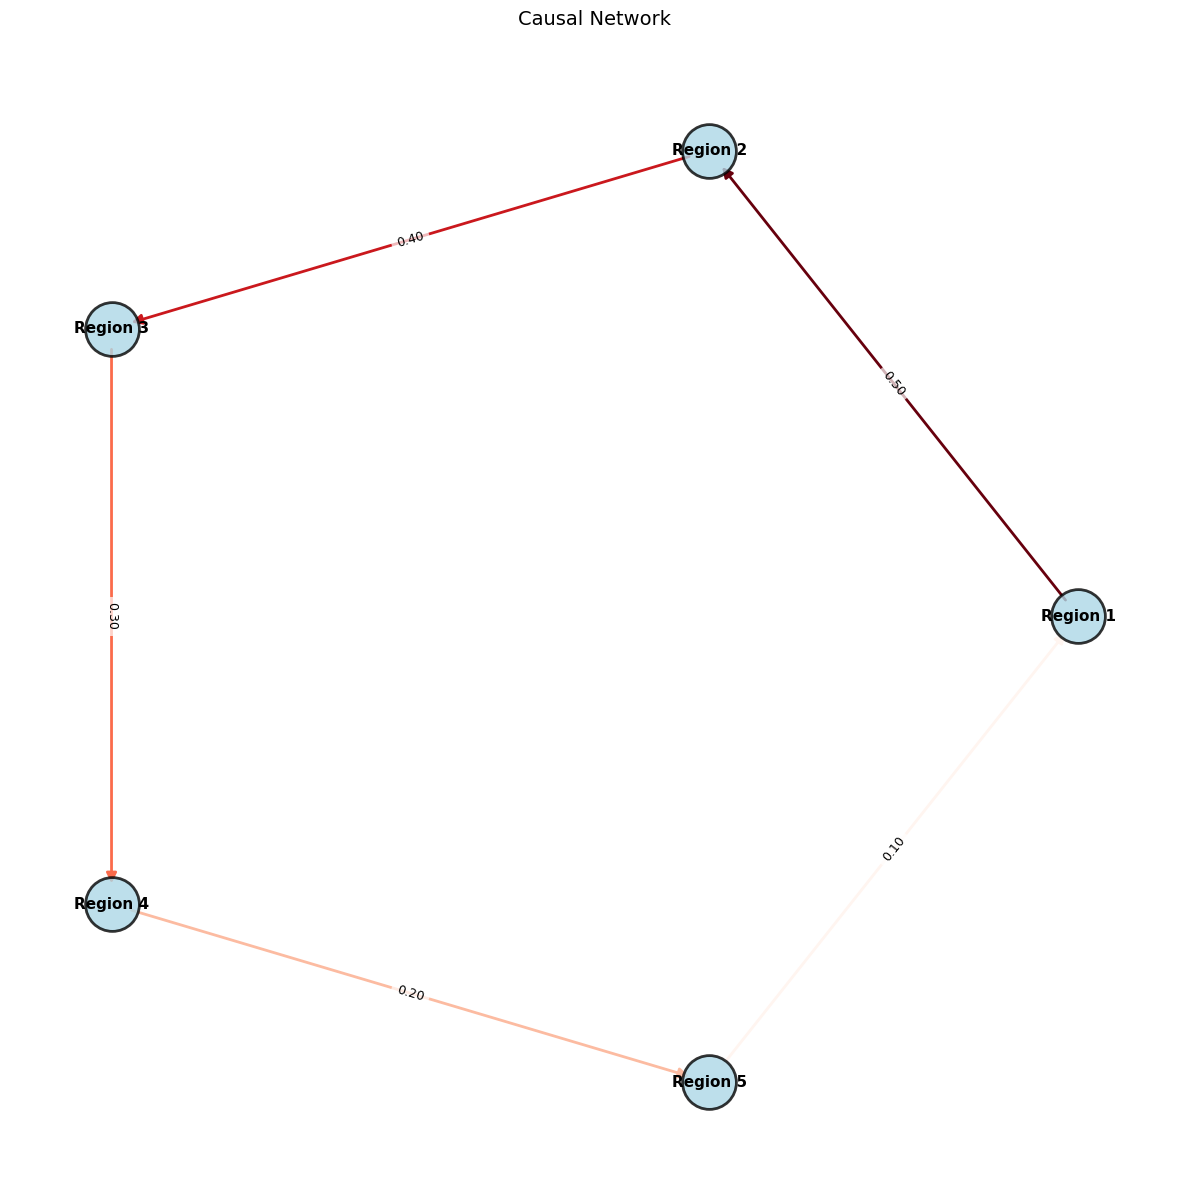

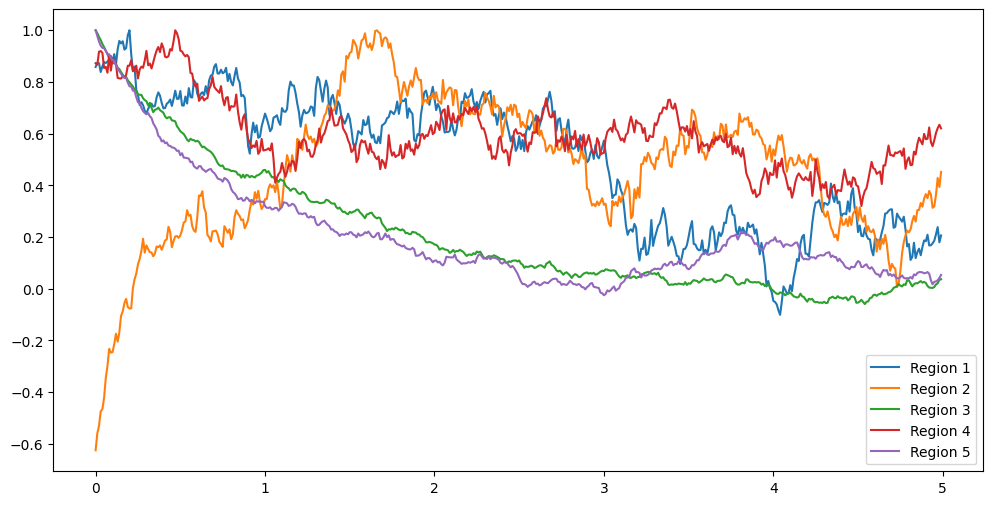

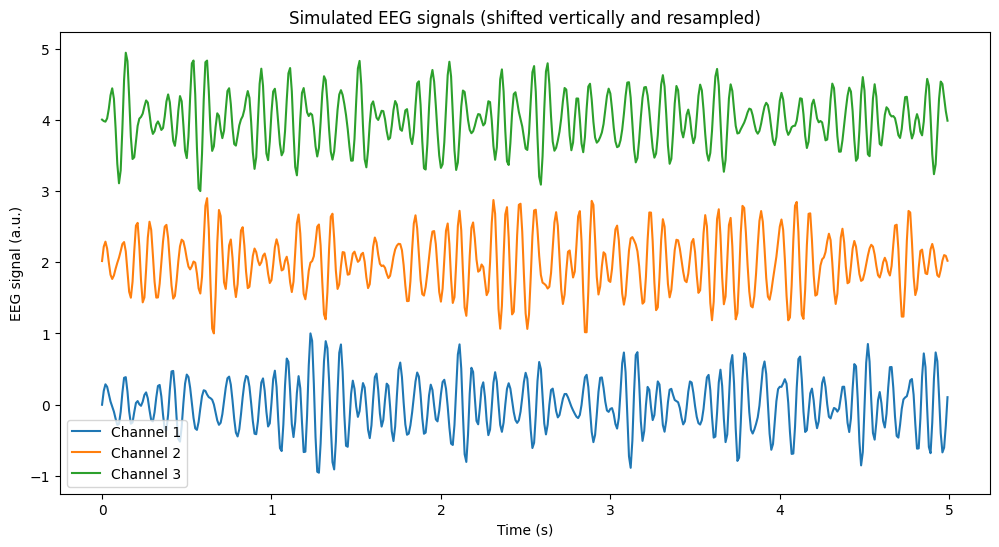

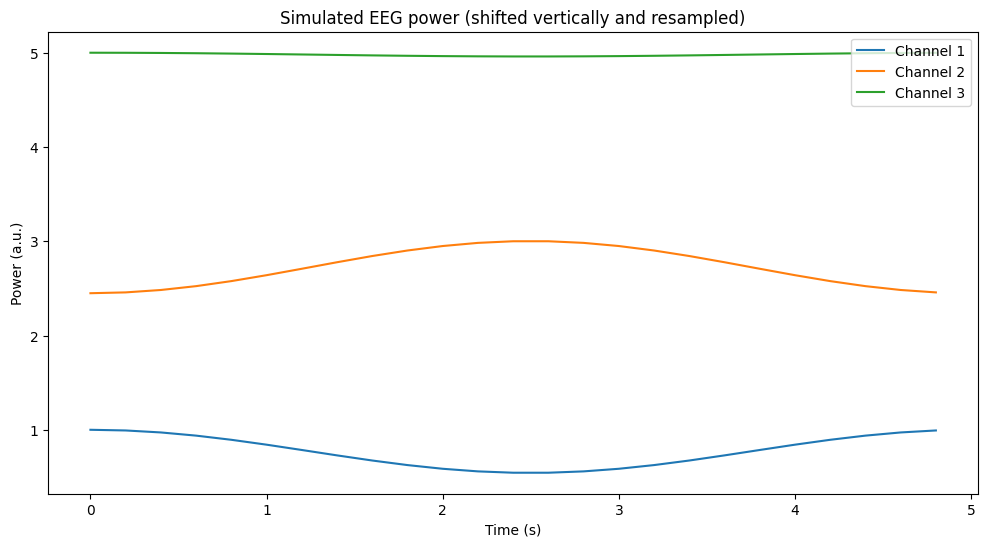

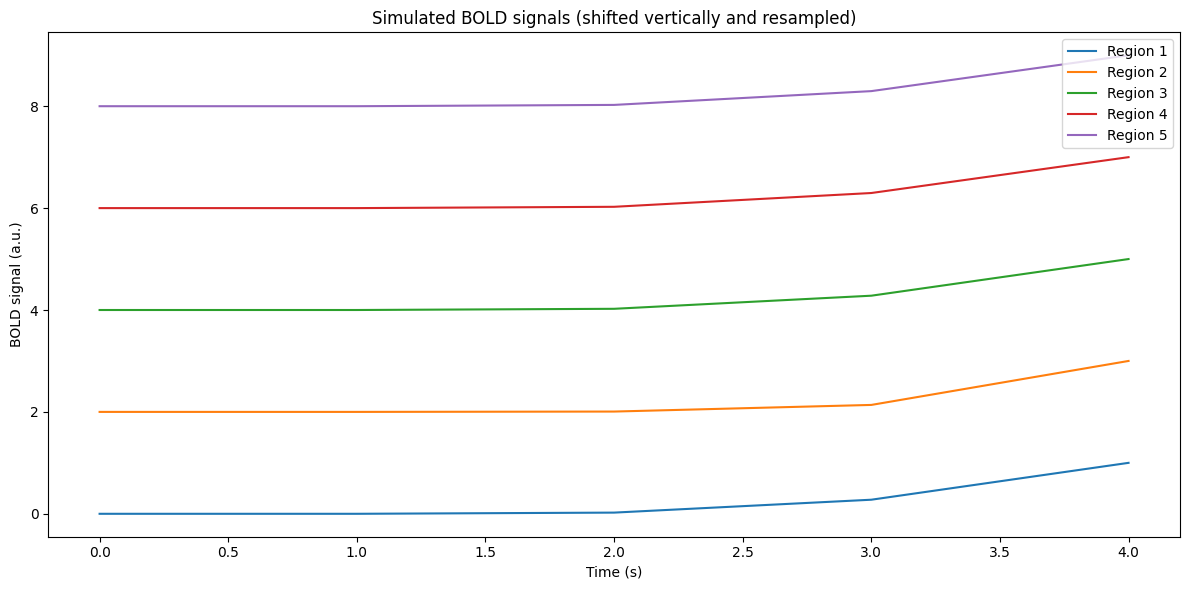

In [1]:
import numpy as np
from multimodal_causal_adversarial_network.dataset.simulation_dataset import SimulationDataset

A = np.array([
    [-1.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, -1.0, 0.4, 0.0, 0.0],
    [0.0, 0.0, -1.0, 0.3, 0.0],
    [0.0, 0.0, 0.0, -1.0, 0.2],
    [0.1, 0.0, 0.0, 0.0, -1.0]
])  # Directed loop

sim = SimulationDataset(A)
sim.plot_causal_graph()
sim.plot_neural_source()
sim.plot_eeg()
sim.plot_power()
sim.plot_bold()

/Users/pcoffey/.pyenv/versions/3.12.9/envs/multimodal-causal-adversarial-network/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
/Users/pcoffey/.pyenv/versions/3.12.9/envs/multimodal-causal-adversarial-network/lib/python3.12/site-packages/keras/src/optimizers/base_optimizer.py:774: UserWarning: Gradients do not exist for variables ['mcan_generator/temperature'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


2025-05-13 23:10:00.047 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 1, Average Gen Loss: 14.1922, Average Disc Loss: 7.4047


2025-05-13 23:10:00.045649: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


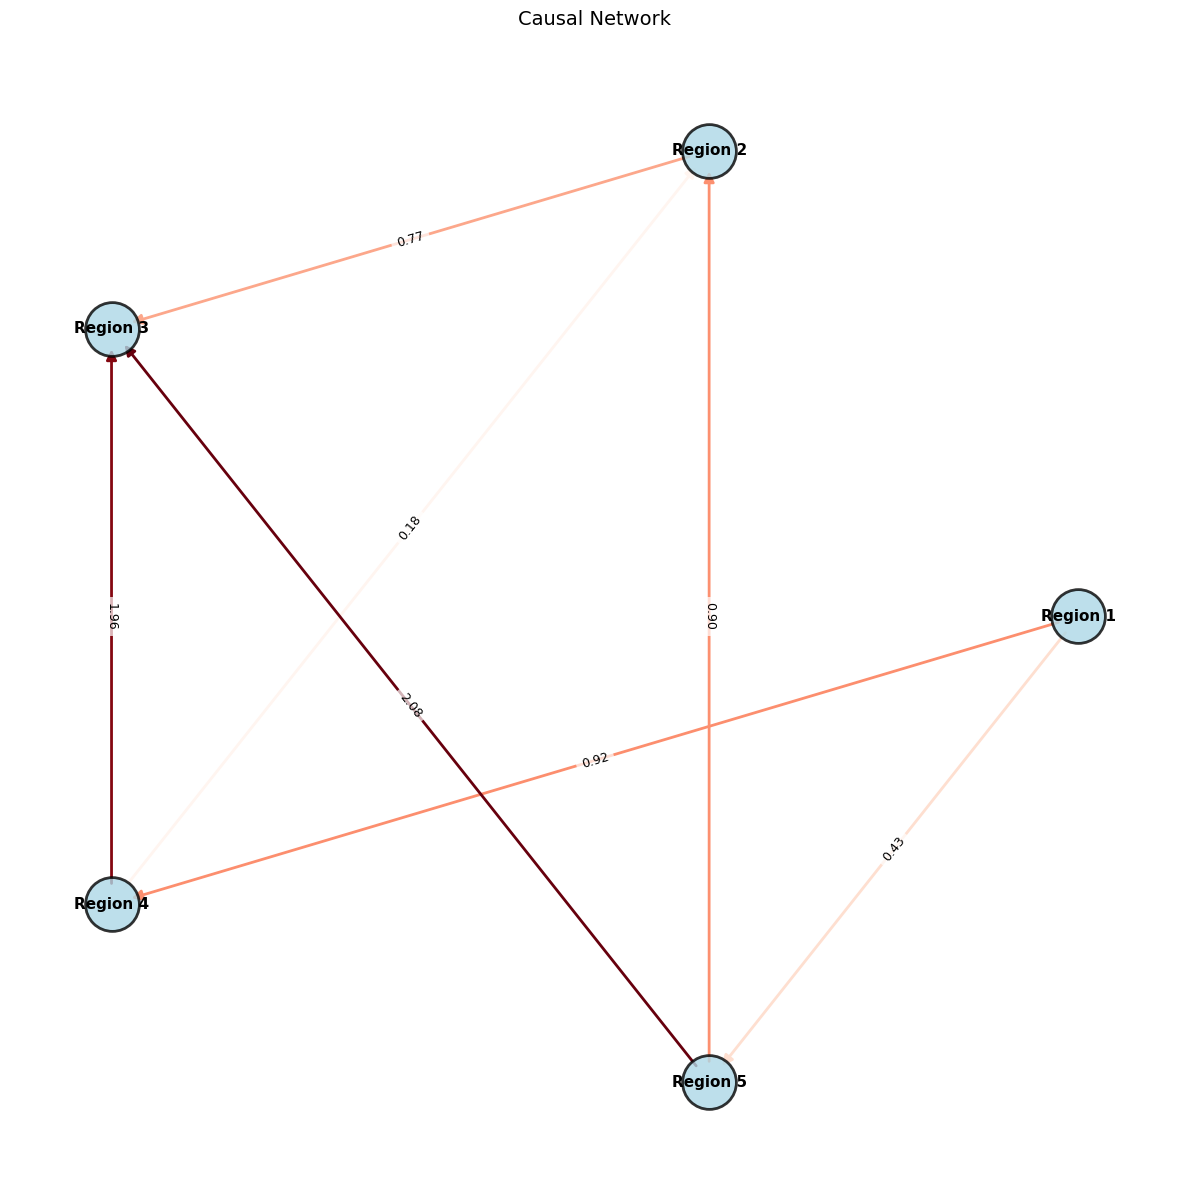

2025-05-13 23:10:24.775 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 2, Average Gen Loss: 6.1083, Average Disc Loss: 2.7722


2025-05-13 23:10:24.774377: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


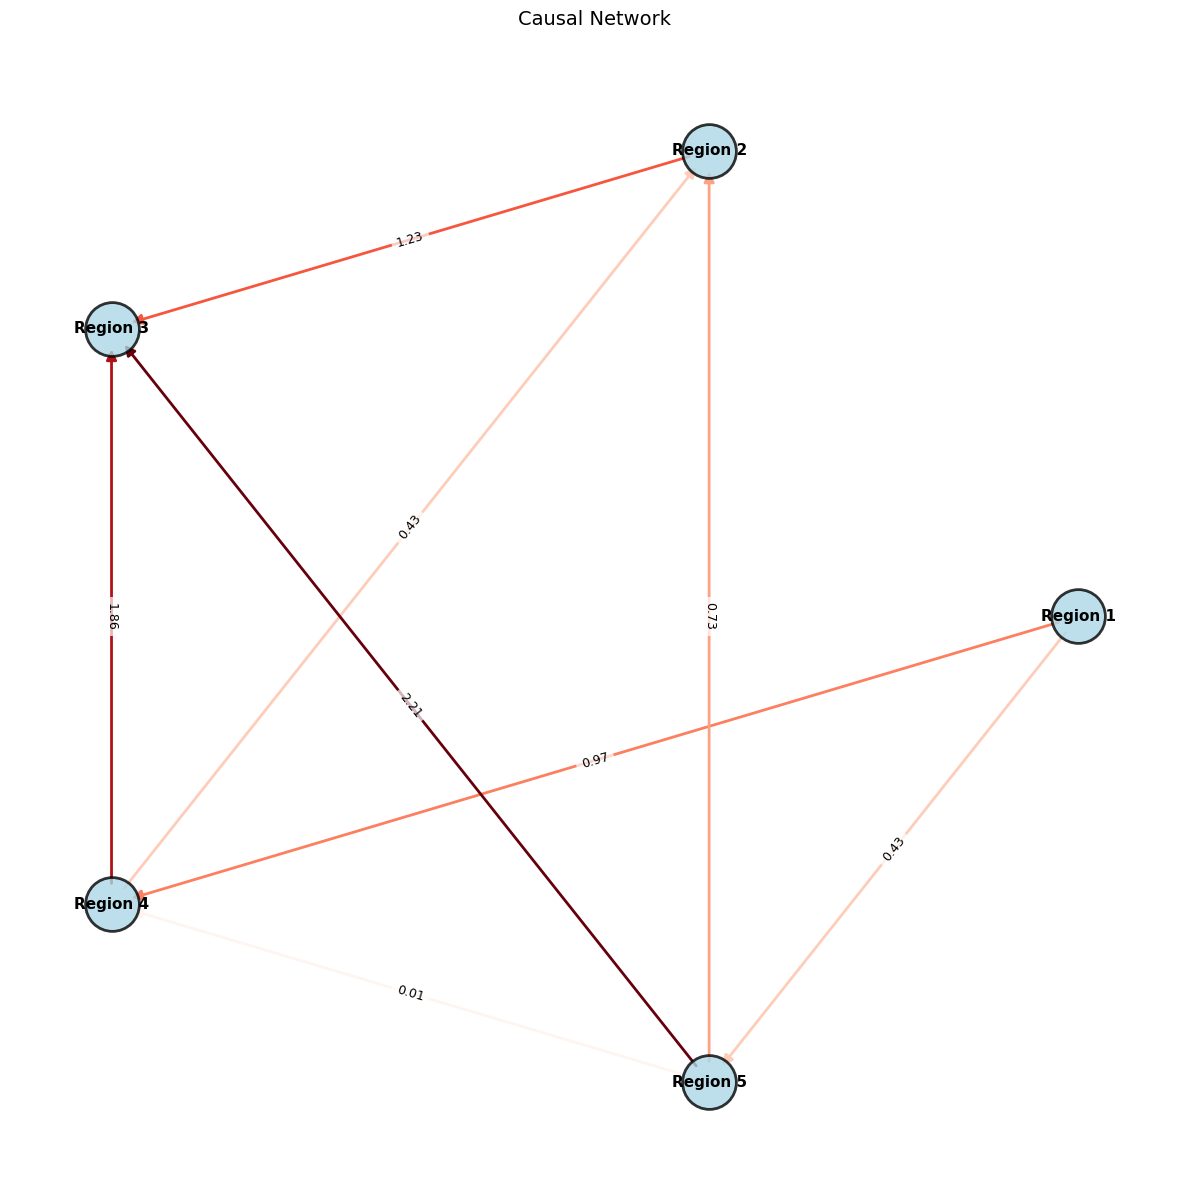

2025-05-13 23:10:50.114 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 3, Average Gen Loss: 2.5009, Average Disc Loss: 2.0521


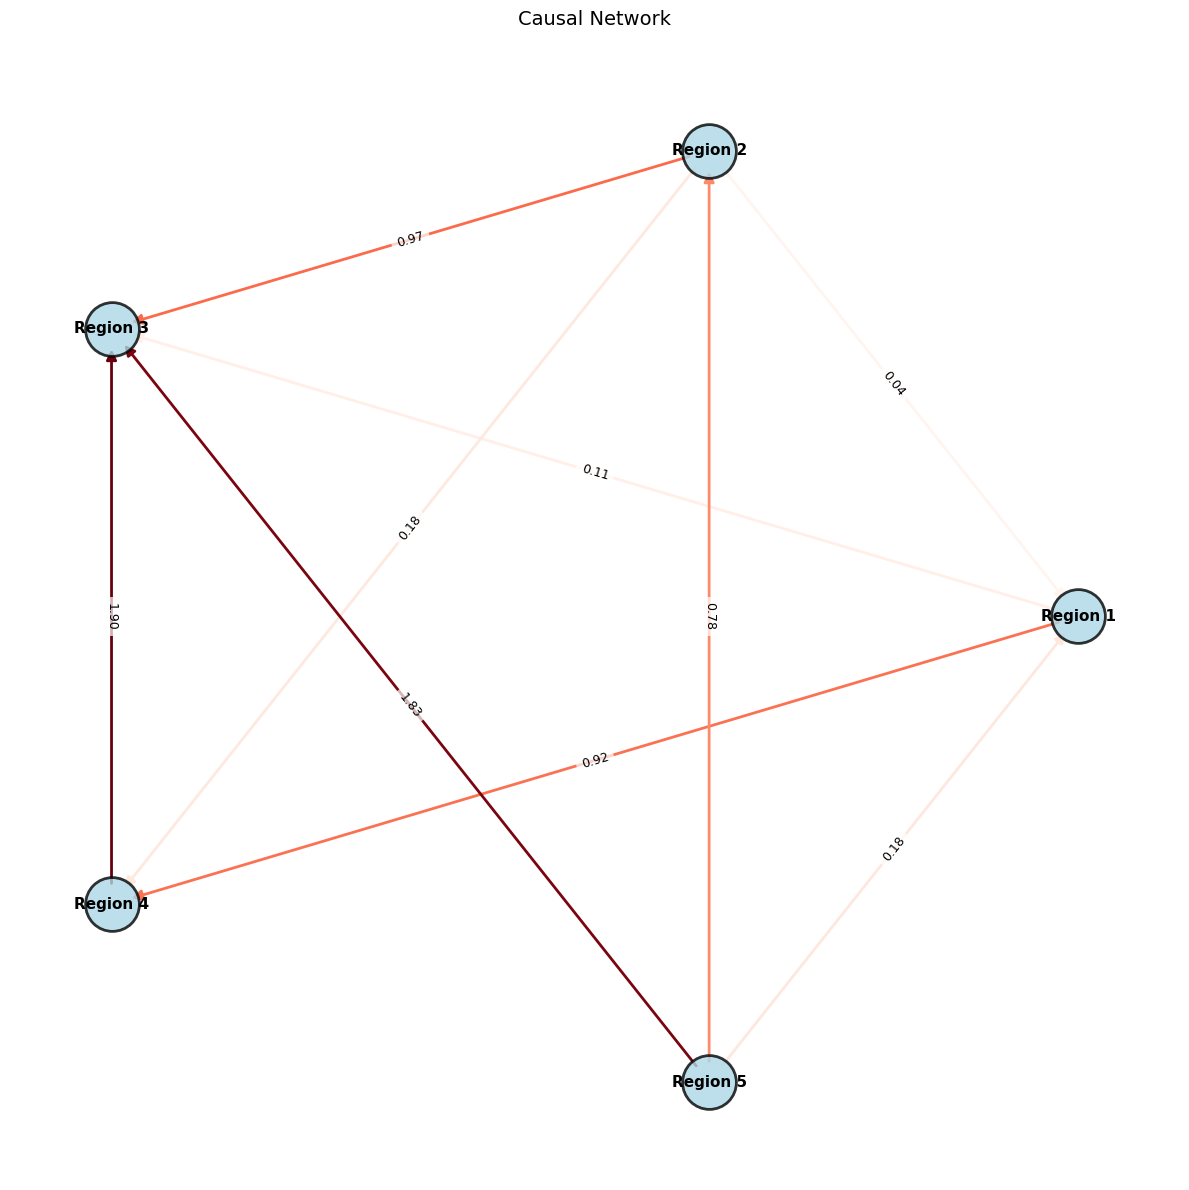

2025-05-13 23:11:15.148 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 4, Average Gen Loss: 2.1760, Average Disc Loss: 1.8555


2025-05-13 23:11:15.147948: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


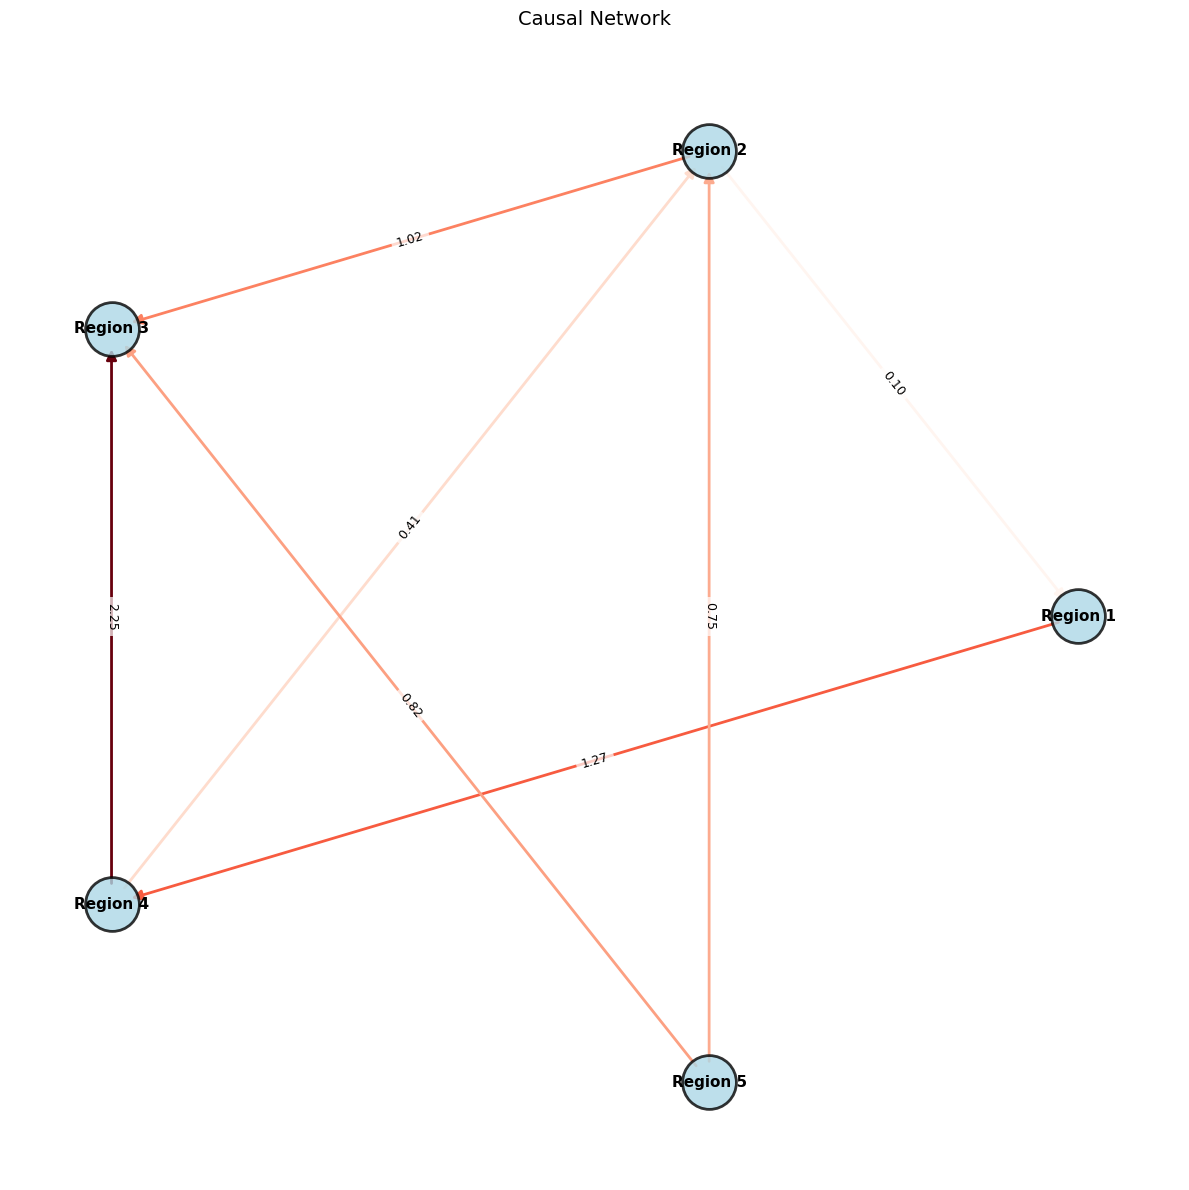

2025-05-13 23:11:39.986 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 5, Average Gen Loss: 1.9601, Average Disc Loss: 1.7082


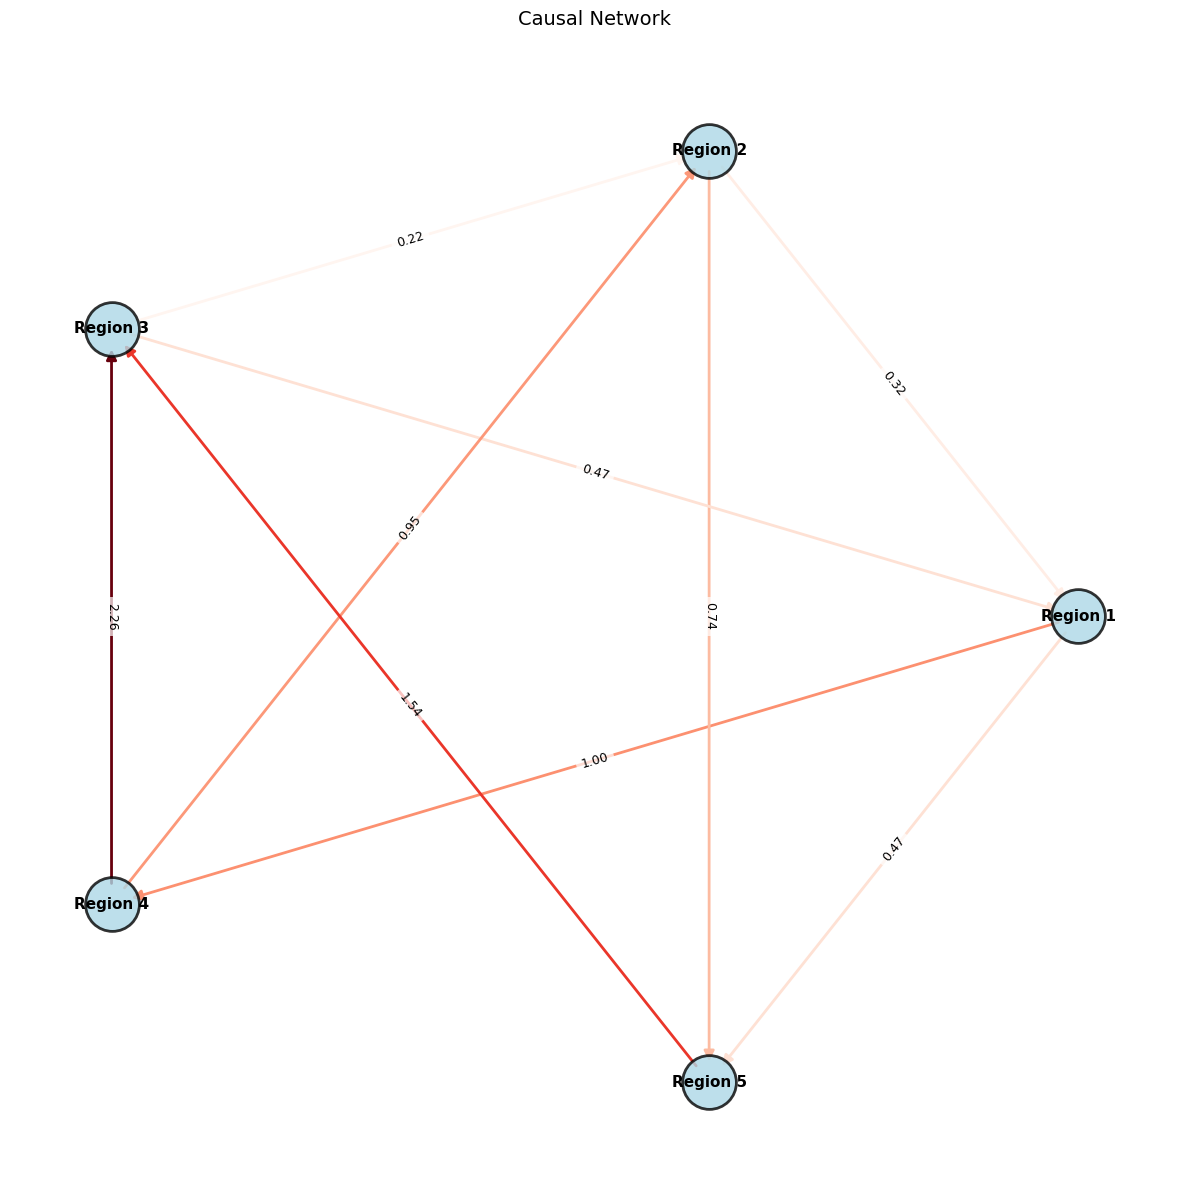

2025-05-13 23:12:05.120 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 6, Average Gen Loss: 1.7866, Average Disc Loss: 1.5917


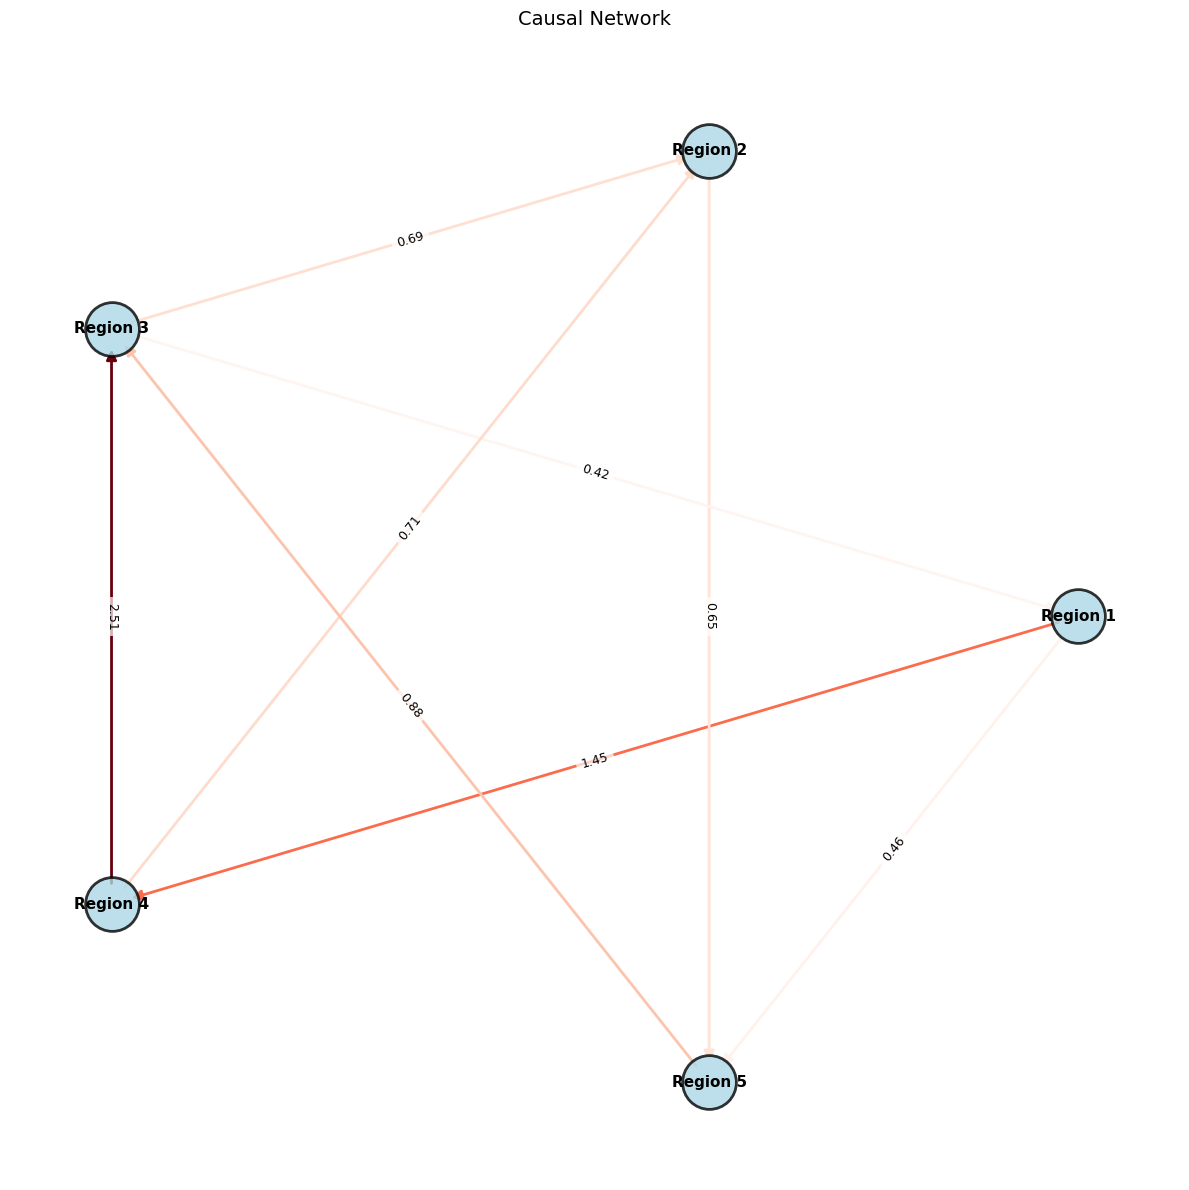

2025-05-13 23:12:30.265 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 7, Average Gen Loss: 1.6250, Average Disc Loss: 1.5018


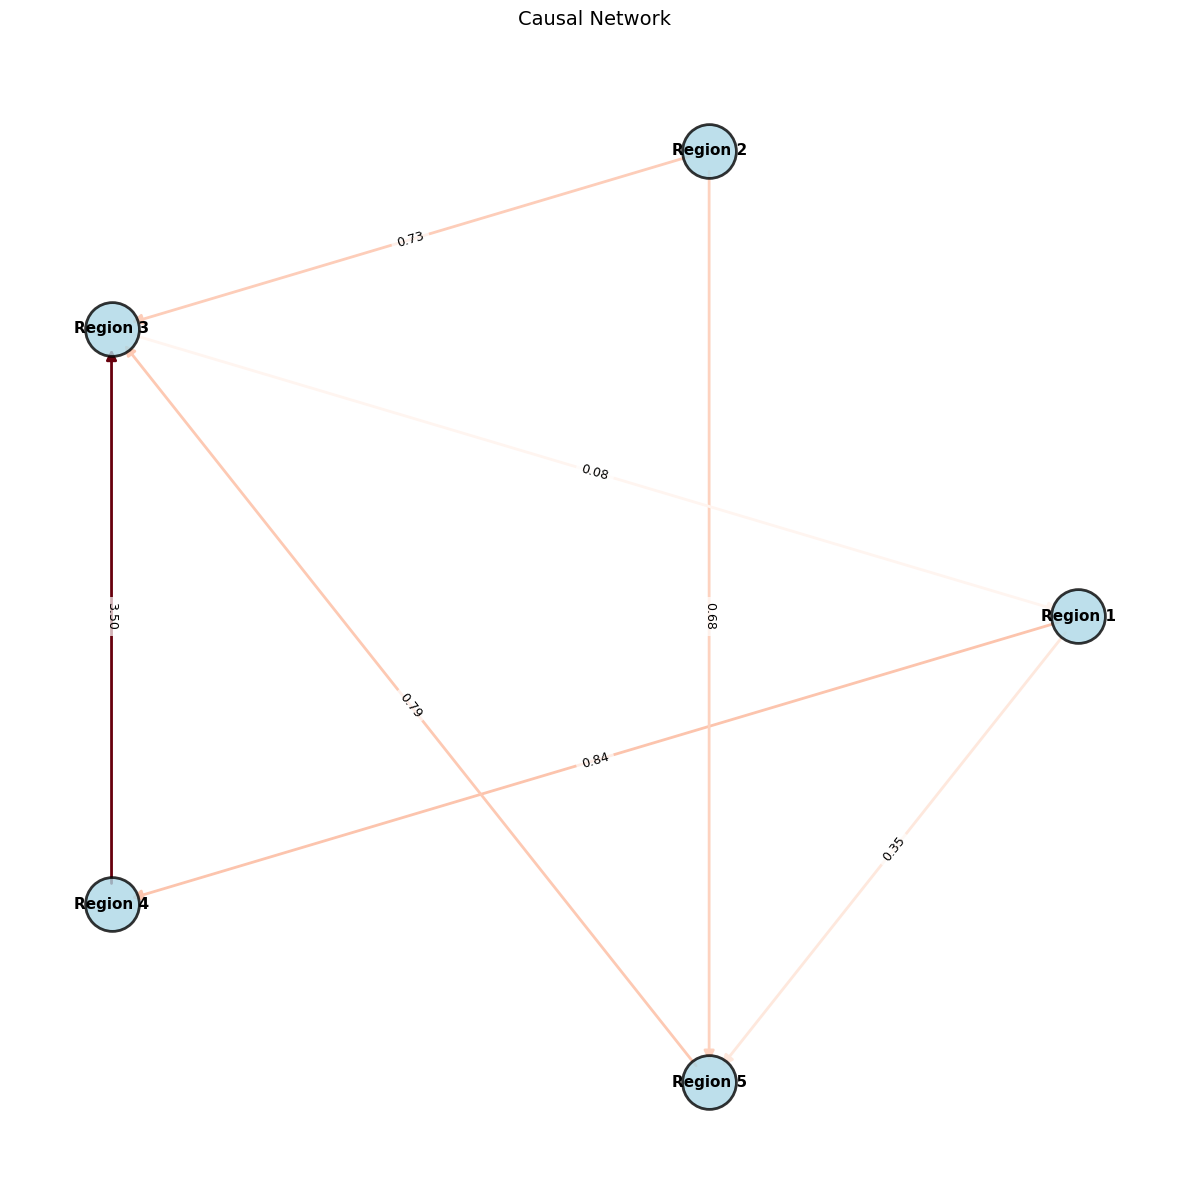

2025-05-13 23:12:55.156 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 8, Average Gen Loss: 1.4735, Average Disc Loss: 1.4356


2025-05-13 23:12:55.155604: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


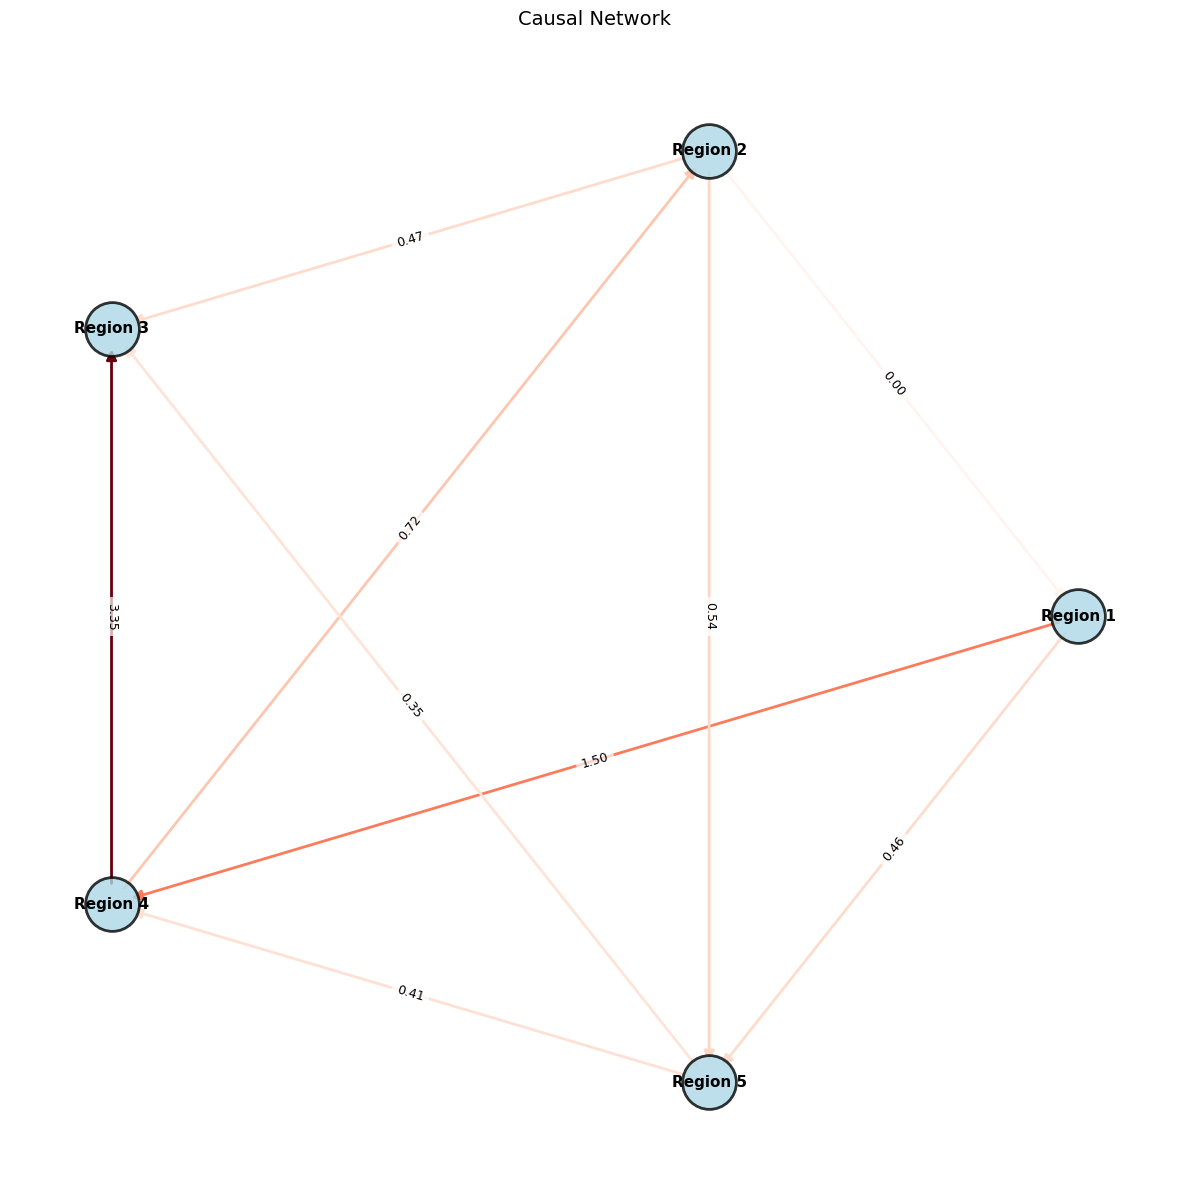

2025-05-13 23:13:20.130 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 9, Average Gen Loss: 1.3469, Average Disc Loss: 1.3843


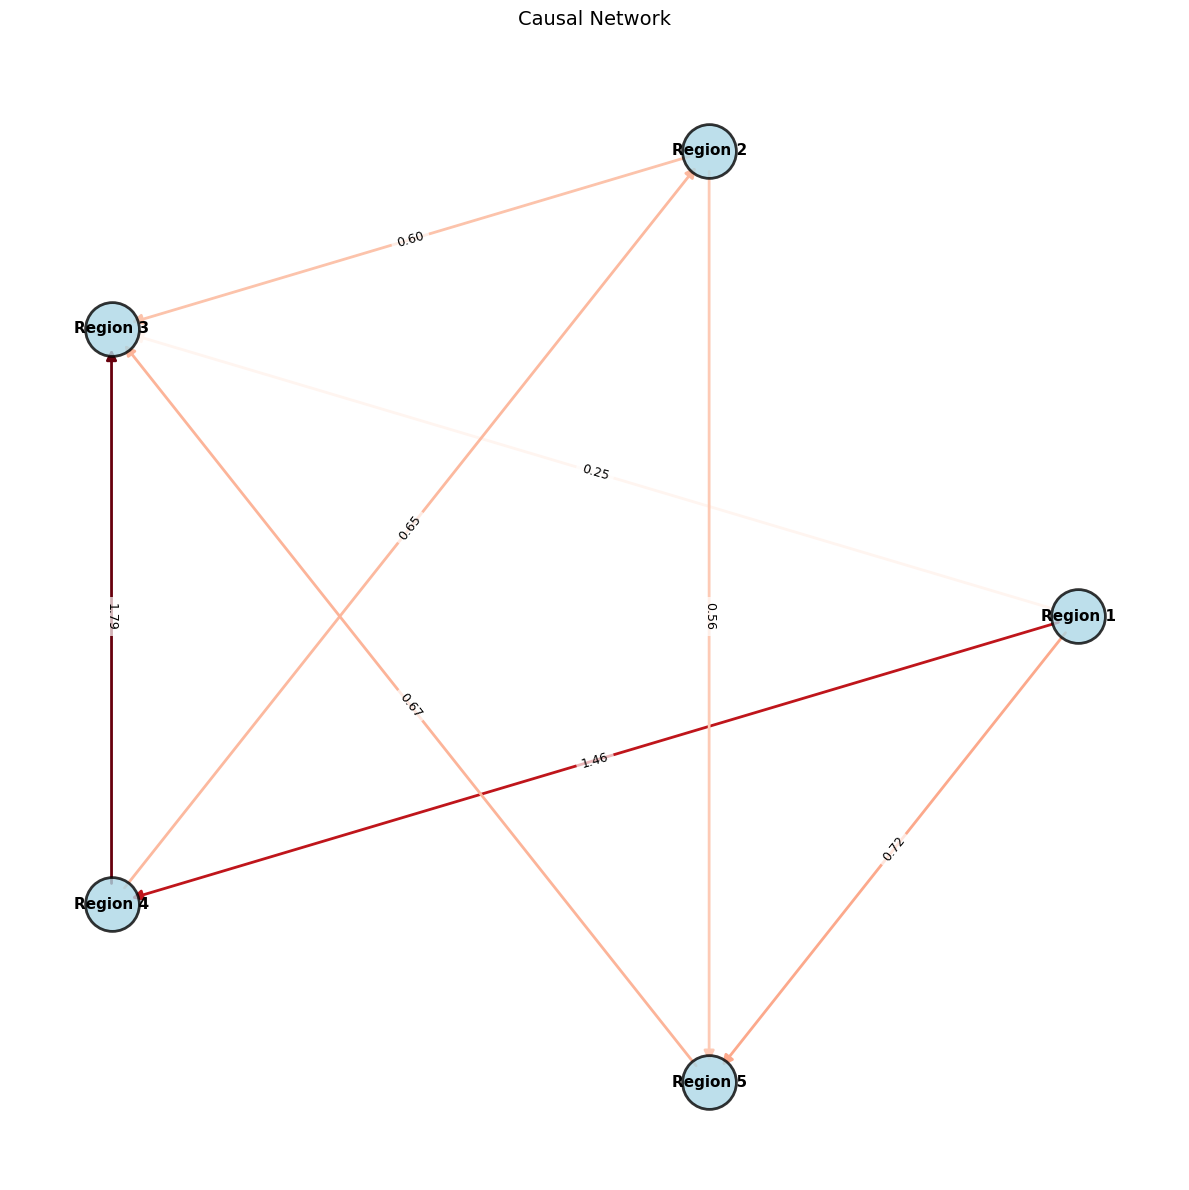

2025-05-13 23:13:44.953 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 10, Average Gen Loss: 1.2354, Average Disc Loss: 1.3448


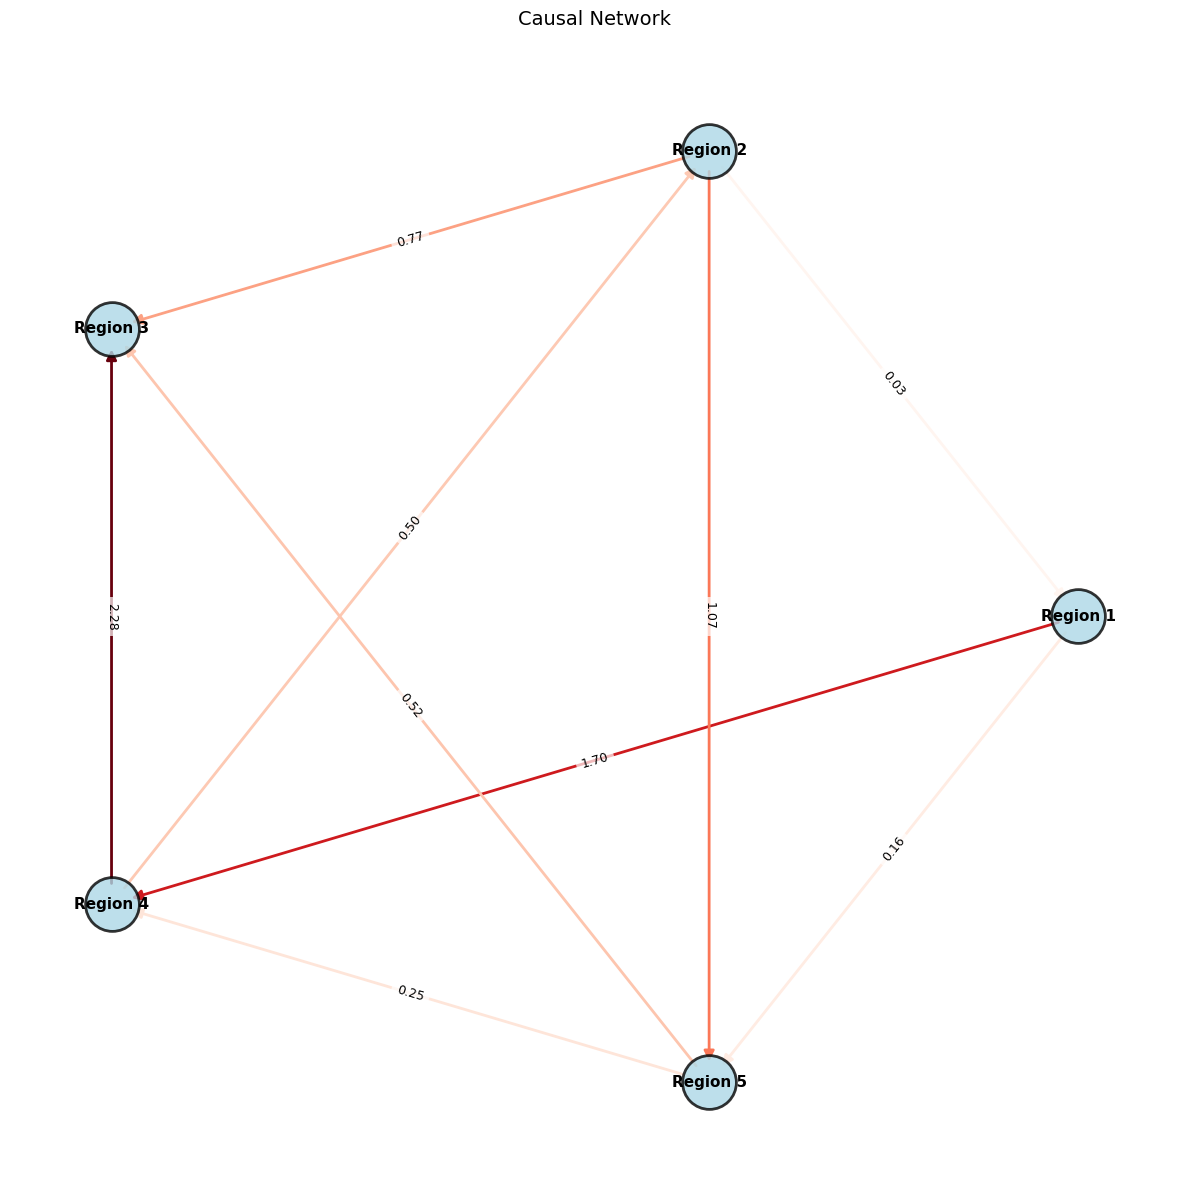

In [2]:
from multimodal_causal_adversarial_network.modeling.mcan_architecture import MCANGenerator
from multimodal_causal_adversarial_network.modeling.train import MCANTrainer


generator = MCANGenerator(
    n_regions=sim.n_regions,
    inference_timepoints=sim.inference_timepoints,
    fmri_timepoints=sim.fmri_timepoints,
    eeg_channels=sim.eeg_channels
)

fmri_shape = (1,) + (sim.fmri_timepoints, sim.n_regions)  # (batch_size, fmri_timepoints, n_regions)
eeg_shape = (1,) + (sim.inference_timepoints, sim.eeg_channels)  # (batch_size, eeg_timepoints, eeg_channels)
generator.build((fmri_shape,))
trainer = MCANTrainer(generator=generator)
# stats = (sim.fmri_mean, sim.fmri_std, None, None, sim.neural_mean, sim.neural_std)

trainer.train(sim.get_dataset(), epochs=10, fmri_only=True)


2025-05-13 23:14:28.929 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 1, Average Gen Loss: 21.8646, Average Disc Loss: 9.8376


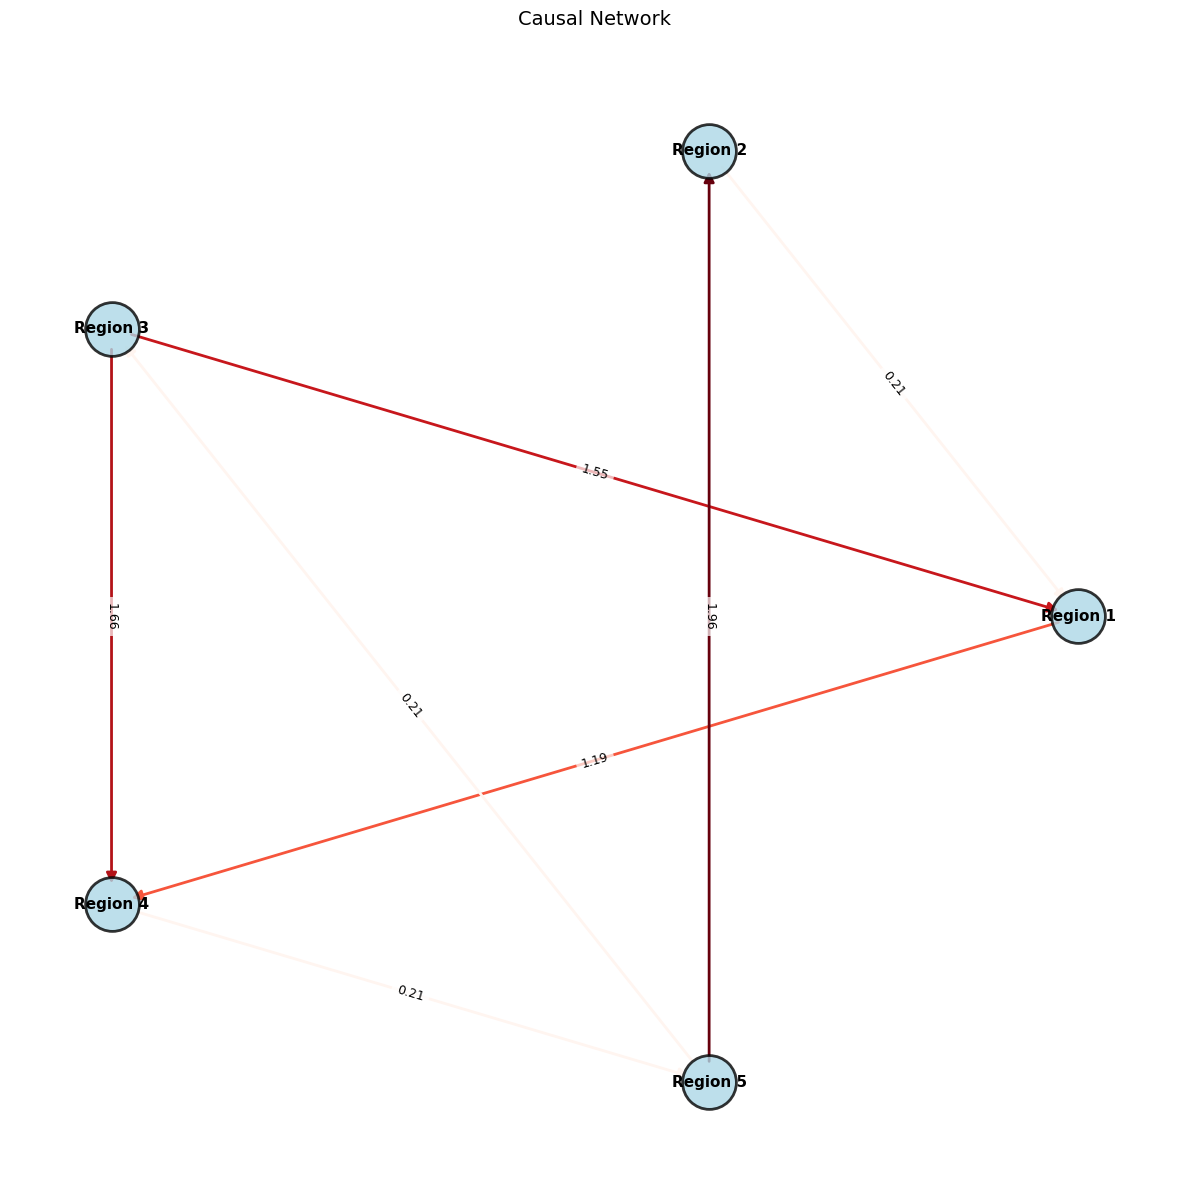

2025-05-13 23:15:14.631 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 2, Average Gen Loss: 20.3837, Average Disc Loss: 7.4590


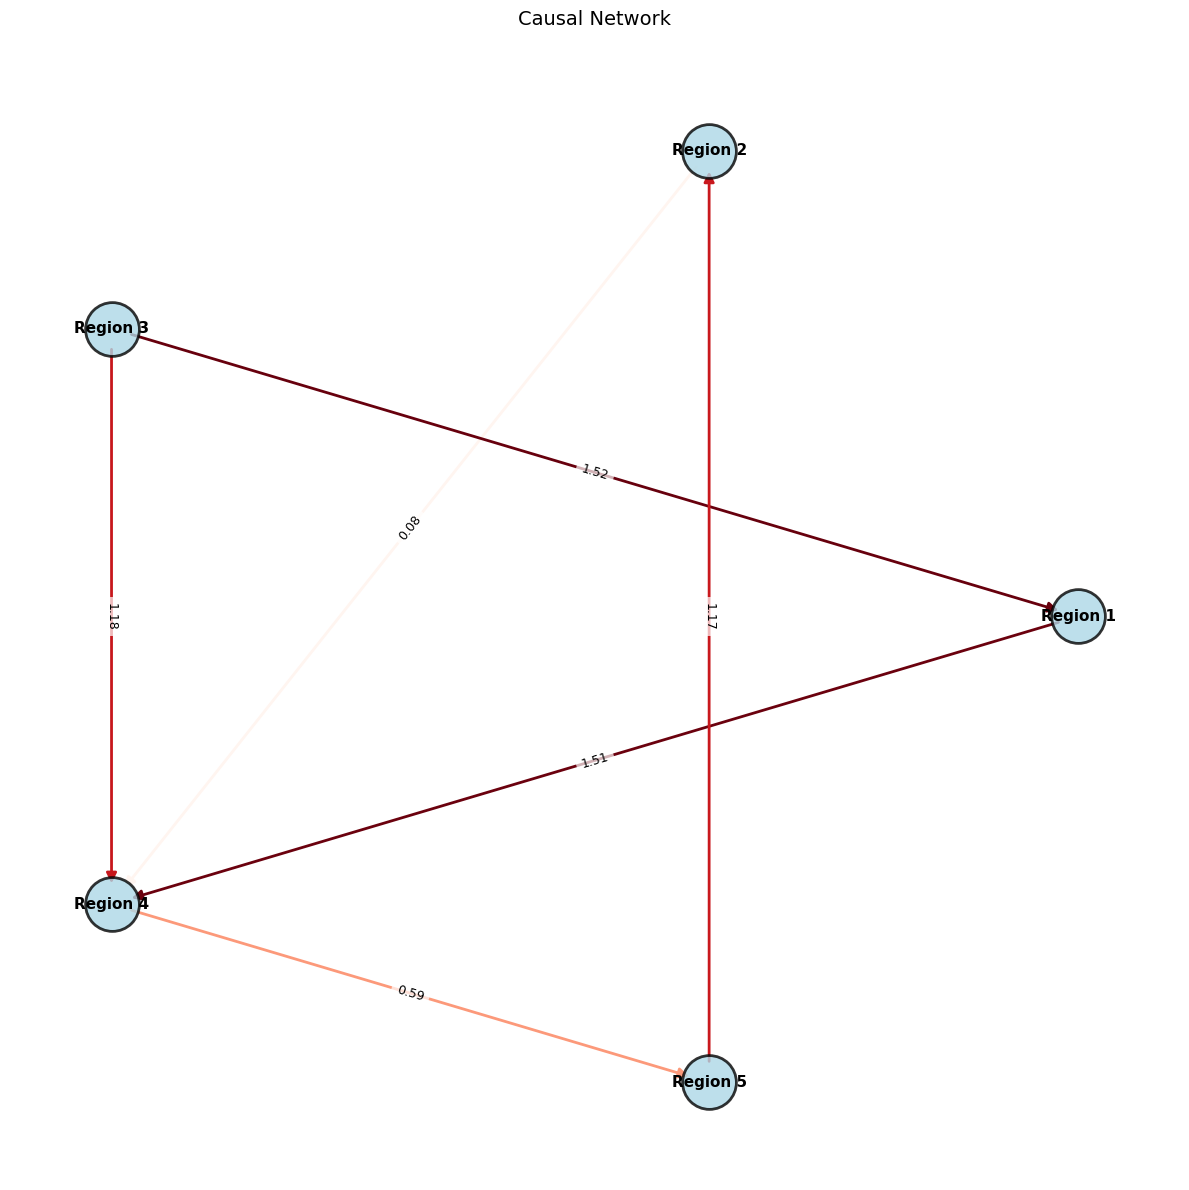

2025-05-13 23:21:21.718 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 3, Average Gen Loss: 19.1011, Average Disc Loss: 6.2676


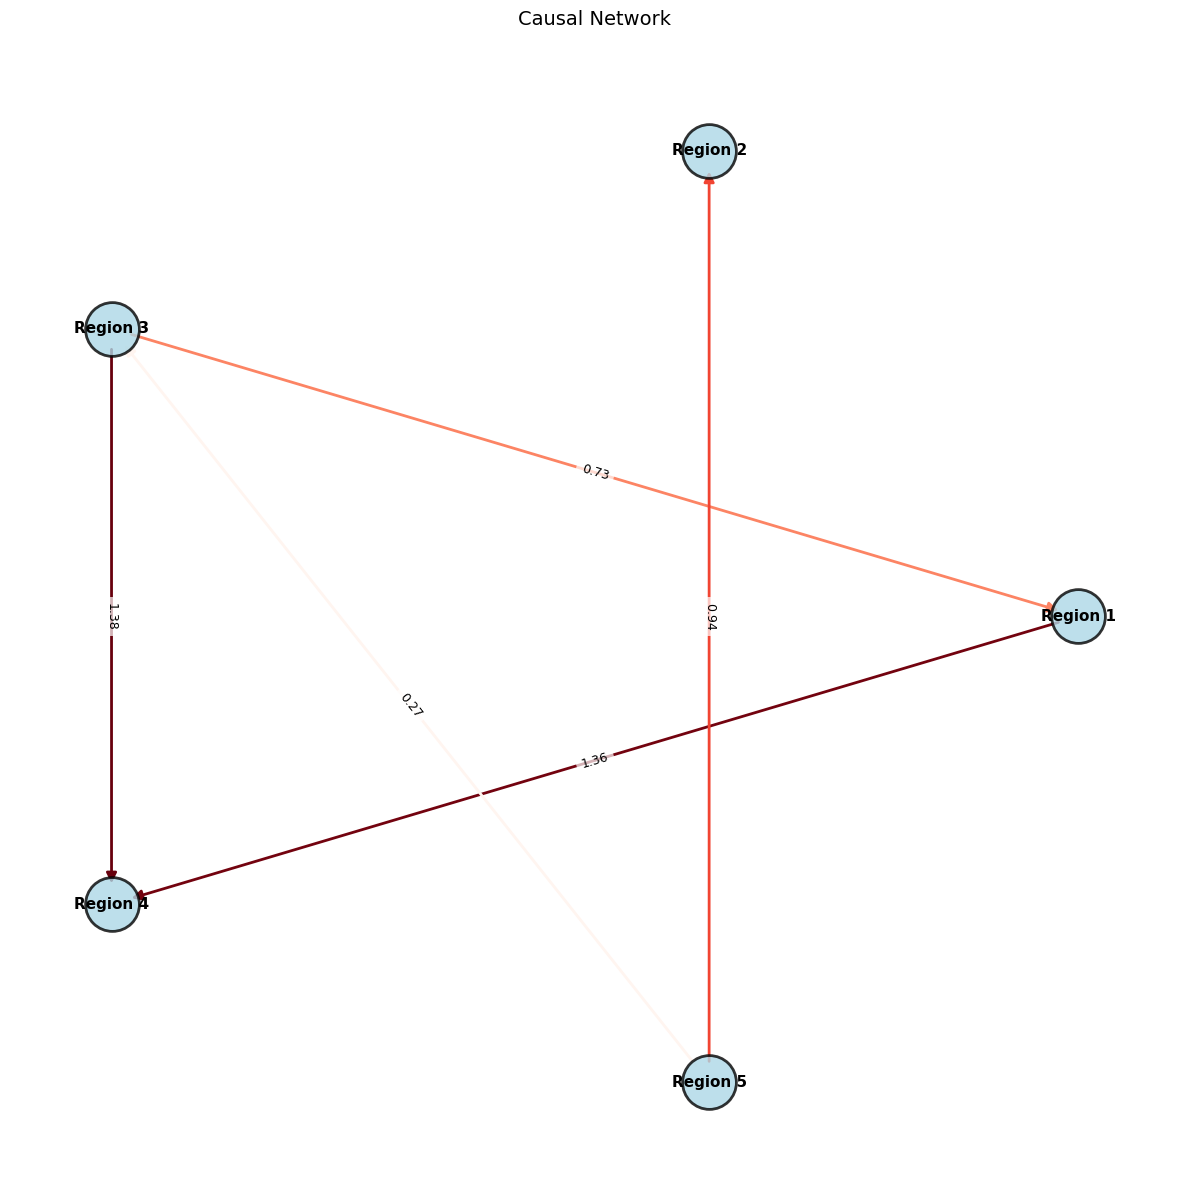

2025-05-13 23:22:11.651 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 4, Average Gen Loss: 18.6878, Average Disc Loss: 5.3284


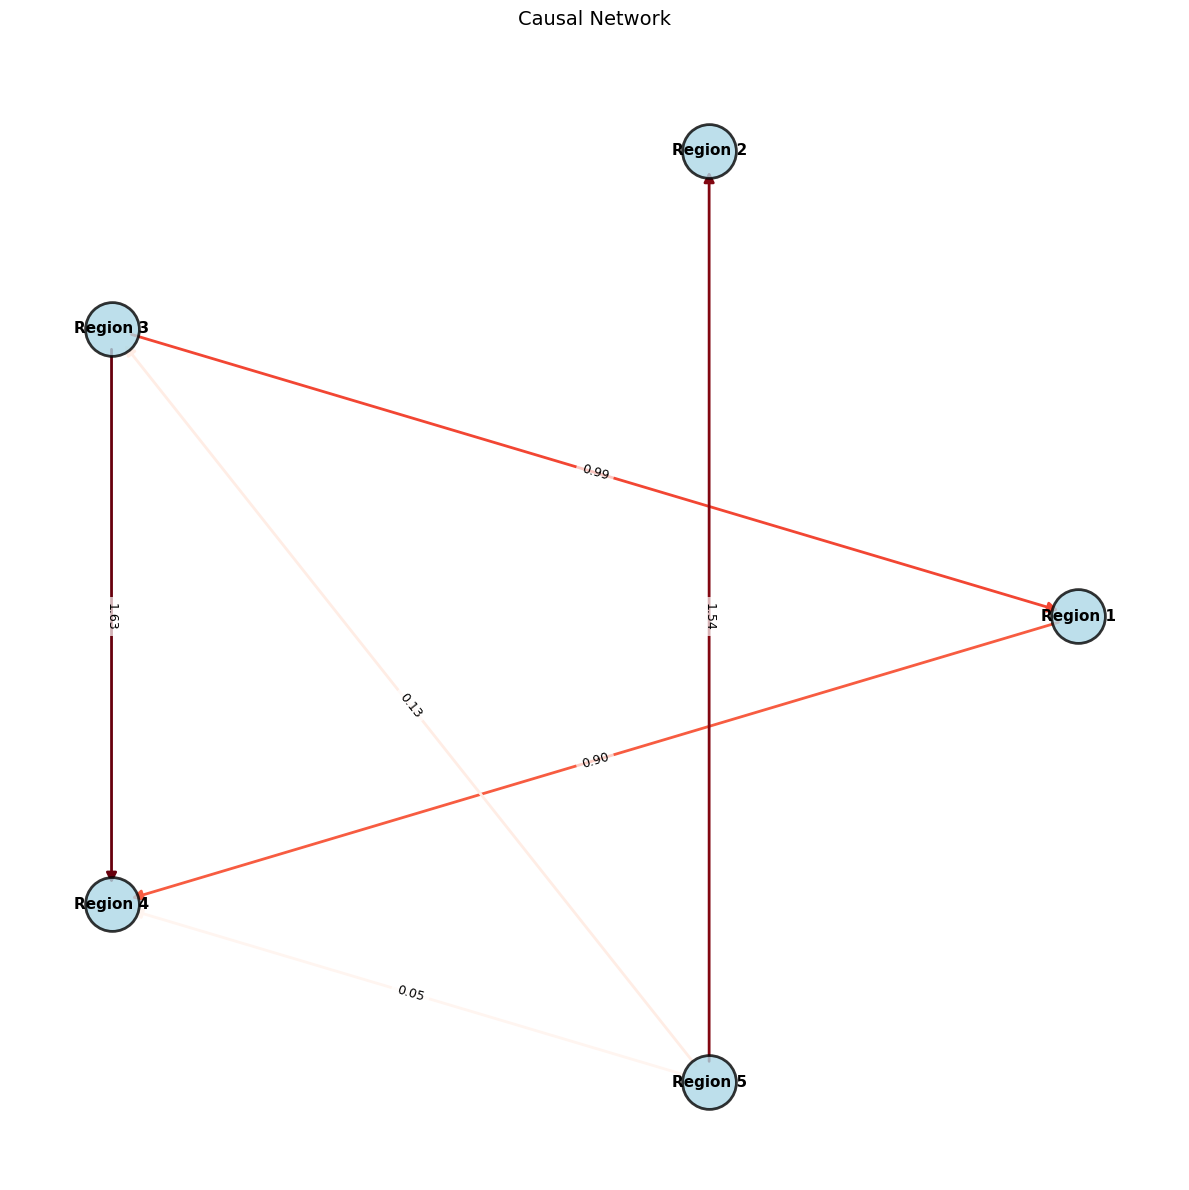

2025-05-13 23:22:59.806 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 5, Average Gen Loss: 18.3041, Average Disc Loss: 4.5690


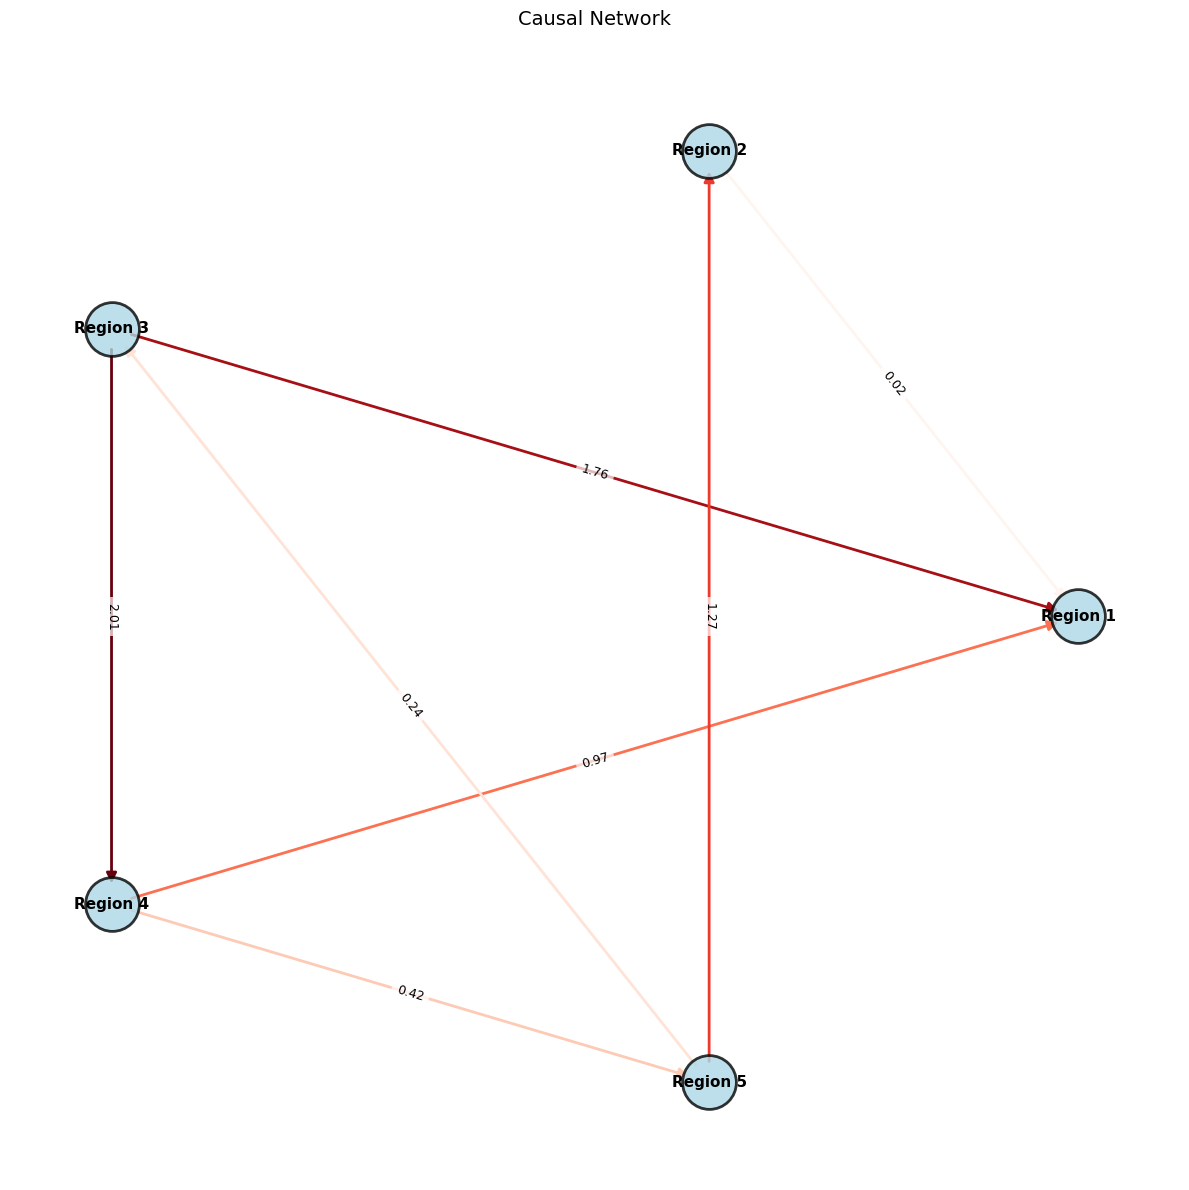

2025-05-13 23:23:50.077 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 6, Average Gen Loss: 17.9844, Average Disc Loss: 3.9616


2025-05-13 23:23:50.076680: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


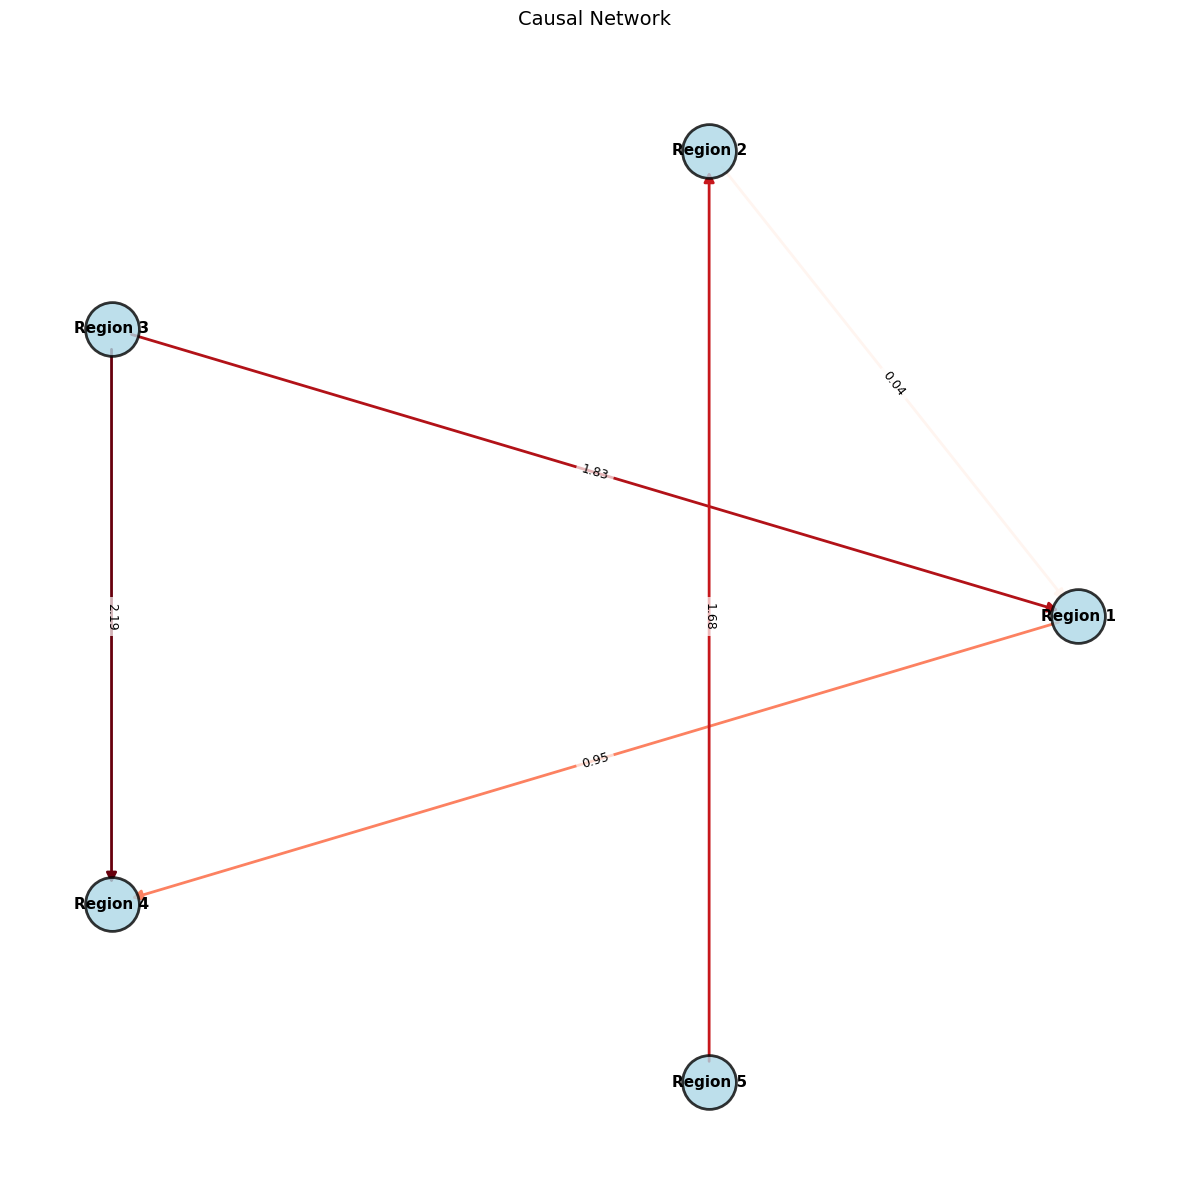

2025-05-13 23:24:40.368 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 7, Average Gen Loss: 17.7033, Average Disc Loss: 3.4788


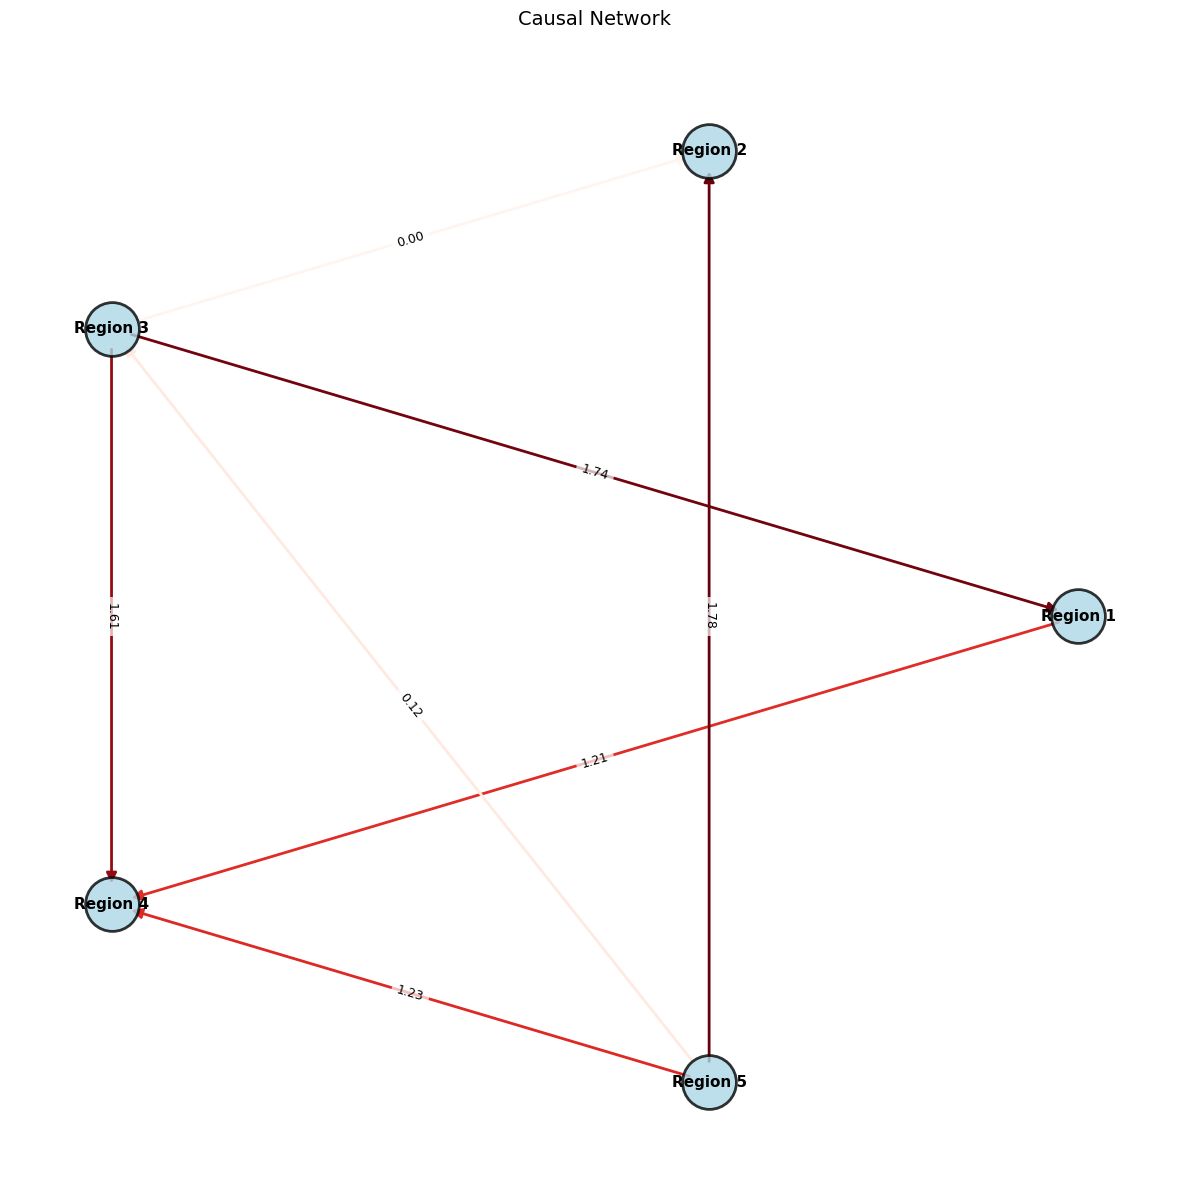

2025-05-13 23:25:30.607 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 8, Average Gen Loss: 17.4643, Average Disc Loss: 3.0905


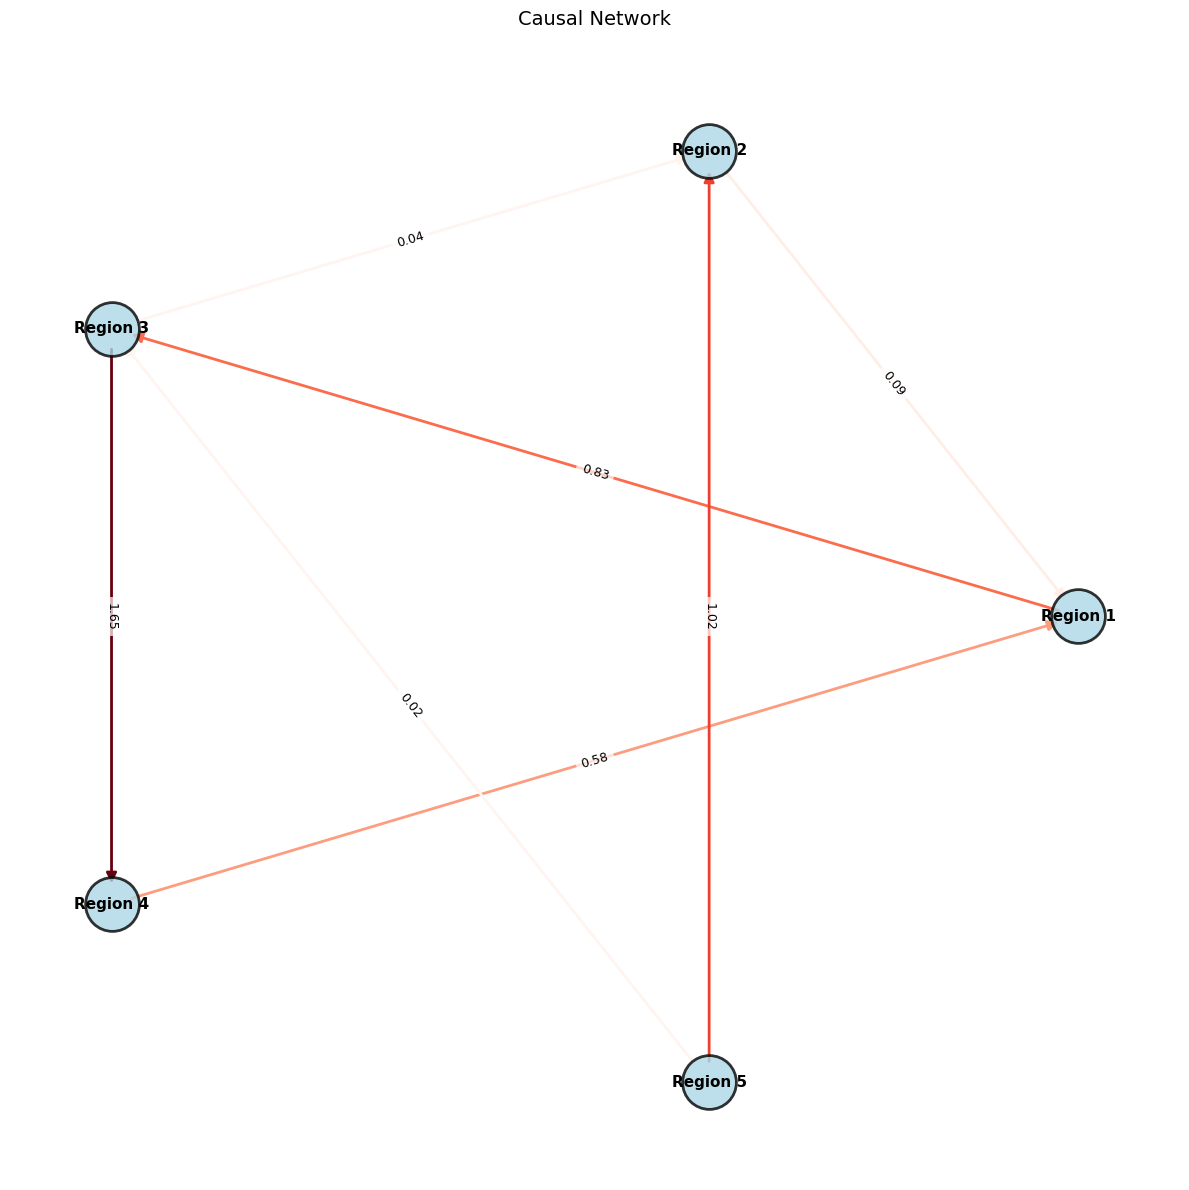

2025-05-13 23:26:20.709 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 9, Average Gen Loss: 17.2532, Average Disc Loss: 2.7782


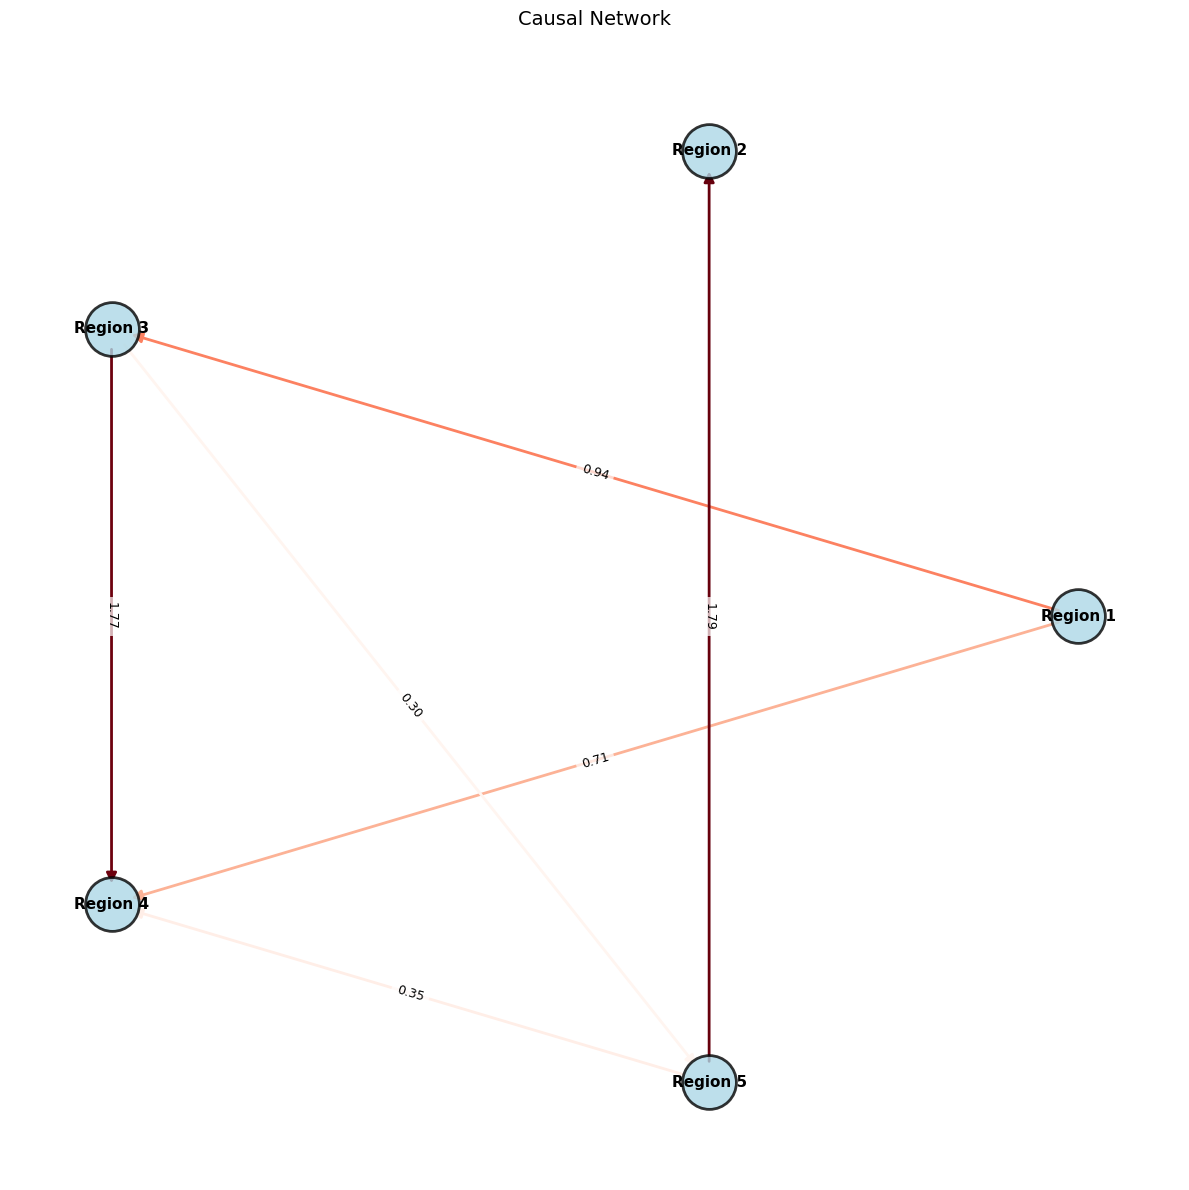

2025-05-13 23:27:10.732 | INFO     | multimodal_causal_adversarial_network.modeling.train:train:181 - Epoch 10, Average Gen Loss: 17.0888, Average Disc Loss: 2.5228


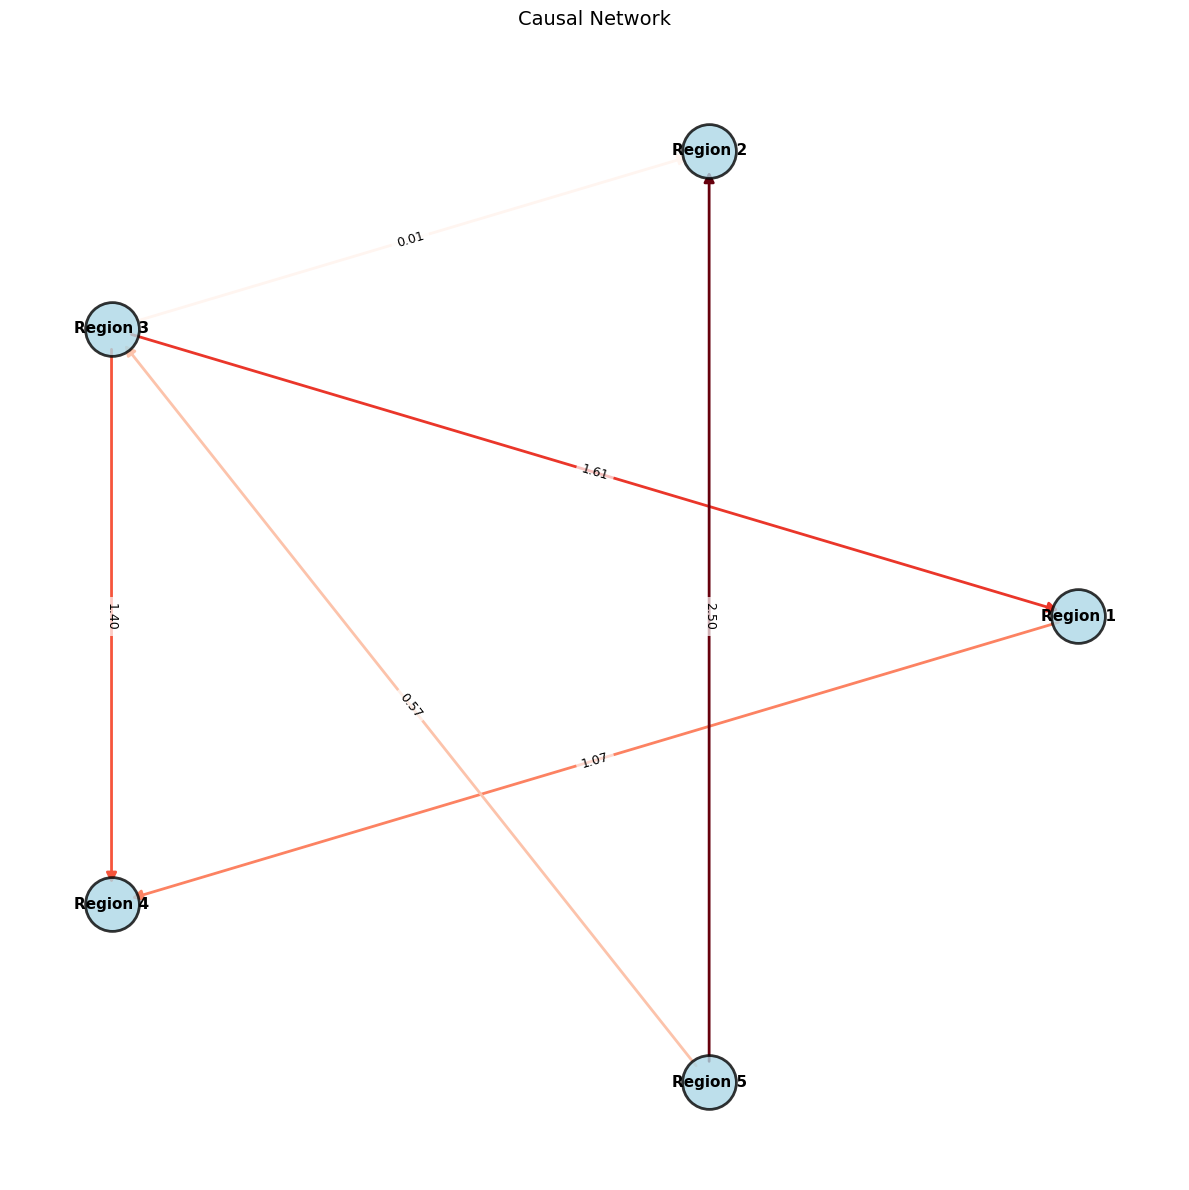

In [3]:
from multimodal_causal_adversarial_network.modeling.mcan_architecture import MCANGenerator
from multimodal_causal_adversarial_network.modeling.train import MCANTrainer


generator2 = MCANGenerator(
    n_regions=sim.n_regions,
    inference_timepoints=sim.inference_timepoints,
    fmri_timepoints=sim.fmri_timepoints,
    eeg_channels=sim.eeg_channels
)

fmri_shape = (1,) + (sim.fmri_timepoints, sim.n_regions)  # (batch_size, fmri_timepoints, n_regions)
eeg_shape = (1,) + (sim.inference_timepoints, sim.eeg_channels)  # (batch_size, eeg_timepoints, eeg_channels)
generator2.build((fmri_shape, eeg_shape))
trainer2 = MCANTrainer(generator=generator2)
# stats = (sim.fmri_mean, sim.fmri_std, sim.power_mean, sim.power_std, sim.neural_mean, sim.neural_std)
trainer2.train(sim.get_dataset(), epochs=10, fmri_only=False)


In [9]:
import tensorflow as tf
from numpy import mean, std
from multimodal_causal_adversarial_network.utils.min_max_scaling import scale_to_unit_range

fmri_encoder = trainer2.generator_model.fmri_encoder
eeg_encoder = trainer2.generator_model.eeg_encoder
fmri_att = trainer2.generator_model.fusion_f
fmri_dcn = trainer2.generator_model.fmri_dcn

dataset = sim.get_dataset()
for fmri, eeg in dataset.take(1):
    print("fmri", fmri.shape, mean(fmri), std(fmri))
    print("eeg", eeg.shape, mean(eeg), std(eeg))
    x_f = tf.expand_dims(fmri, axis=0)
    x_e = tf.expand_dims(eeg, axis=0)
    print(x_f.shape, x_e.shape)
    x_f, _ = scale_to_unit_range(x_f)
    x_e, _ = scale_to_unit_range(x_e)
    s_f = fmri_encoder(x_f, mode="encode", training=False)
    s_e = eeg_encoder(x_e, mode="encode", training=False)
    print("s_f", mean(s_f), std(s_f))
    print("s_e", mean(s_e), std(s_e))
    o1_f, att_f = fmri_att(s_f, s_f)
    print("o1_f", mean(o1_f), std(o1_f))
    o2_f, W = fmri_dcn(o1_f)
    print(mean(o2_f), std(o2_f))
    s_f_post = o1_f + o2_f
    x_f_post = fmri_encoder(s_f_post, mode="decode", training=False)
    print(mean(x_f_post), std(x_f_post))


fmri (200, 5) 0.0014801241 0.0044330023
eeg (500, 3) 0.0014281747 0.00042448667
(1, 200, 5) (1, 500, 3)
s_f 0.53087234 0.7433748
s_e 0.51054144 0.6830053
o1_f -0.009964635 0.9518352
0.0046135173 0.030634888
-0.16316211 0.043380383


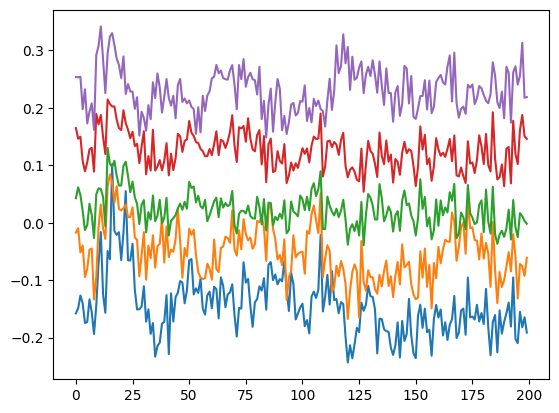

In [11]:
import matplotlib.pyplot as plt

p = tf.squeeze(x_f_post, axis=0)
for i in range(5):
    plt.plot(p[:, i]+ i*0.1)
plt.show()


In [14]:
trainer2.generator_model.summary()

Model: "mcan_generator_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fmri_source_encoder_1           │ ?                      │       103,301 │
│ (FmriSourceEncoder)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ eeg_source_encoder              │ ?                      │            53 │
│ (EegSourceEncoder)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate_1 (Concatenate)     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_fusion_1              │ ?                      │        42,560 │
│ (AttentionFusion)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_fusion_2              │ ?                      │        42,560 │
│ (AttentionFusion)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dynamic_causal_network_1        │ ?                      │        12,940 │
│ (DynamicCausalNetwork)          │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dynamic_causal_network_2        │ ?                      │        12,940 │
│ (DynamicCausalNetwork)          │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,355 (837.32 KB)

 Trainable params: 212,859 (831.48 KB)

 Non-trainable params: 1,496 (5.84 KB)

In [12]:
trainer.generator_model.summary()

Model: "mcan_generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ fmri_source_encoder             │ ?                      │       103,301 │
│ (FmriSourceEncoder)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ concatenate (Concatenate)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention_fusion                │ ?                      │        42,560 │
│ (AttentionFusion)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dynamic_causal_network          │ ?                      │        12,940 │
│ (DynamicCausalNetwork)          │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,802 (620.32 KB)

 Trainable params: 157,362 (614.70 KB)

 Non-trainable params: 1,440 (5.62 KB)

In [13]:
trainer.fmri_discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ spectral_normalization          │ (1, 128)               │           896 │
│ (SpectralNormalization)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (1, 128)               │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_normalization_1        │ (1, 64)                │         8,320 │
│ (SpectralNormalization)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (1, 64)                │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_normalization_2        │ (1, 32)                │         2,112 │
│ (SpectralNormalization)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (1, 32)                │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spectral_normalization_3        │ (1, 1)                 │            34 │
│ (SpectralNormalization)         │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,258 (47.88 KB)

 Trainable params: 11,585 (45.25 KB)

 Non-trainable params: 673 (2.63 KB)

In [6]:
sim.fmri_timepoints

200

In [7]:
sim.inference_timepoints

500